# Statistical Non-parametric Testing Project

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from decimal import Decimal
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
# Files Heading Names
files_headings = ['jSO', 'MM_OED', 
                  'IDEbestNsize', 'RB-IPOP-CMA-ES', 
                  'LSHADE_SPACMA', 'DES',
                  'DYYPO', 'TLBO-FL',
                  'MOS-CEC2013', 'EBOwithCMAR', 
                  'PPSO'
                    ]

# Papers Names
papers_names = [  'P17315', 'P17321', 
                  'P17322', 'P17343',
                  'P17051', 'P17420',
                  'P17543', 'P17544',
                  'P17260', 'P17411',
                  'P17447'
                 ]

#  Indexing the files_headings by the paper name
files_headings = dict(zip(papers_names, files_headings))

# Exceptional Papers
exception_paper = {'P17322':"ReverseDimensionFun", 
                   'P17260':"CSVFile",
                   'P17411': "DatExtension"
                    }

# Dimensons
dimensions = [10, 30, 50, 100]
record_fun_errors = [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 ]

In [3]:
# Verifying creation of file names
files_headings

{'P17315': 'jSO',
 'P17321': 'MM_OED',
 'P17322': 'IDEbestNsize',
 'P17343': 'RB-IPOP-CMA-ES',
 'P17051': 'LSHADE_SPACMA',
 'P17420': 'DES',
 'P17543': 'DYYPO',
 'P17544': 'TLBO-FL',
 'P17260': 'MOS-CEC2013',
 'P17411': 'EBOwithCMAR',
 'P17447': 'PPSO'}

In [4]:
# Get the current working directory path
data_folder_path = os.path.abspath(os.getcwd()) + '/PaperRawData'

In [5]:
# Read file into numpy array
def convertFileToNumpy(file_name):
    '''' 
    Parameters: file_name, it takes the file name 
    return: It returns the data contained in the file as numpy array
    '''
    global data_folder_path
    # Get the full path of the file 'f.txt'
    file_path = os.path.join(data_folder_path,file_name)

    # for csv files in paper 17260
    if file_name.endswith("csv"):
        df = pd.read_csv(file_path, sep=",")
        df = df.drop(df.columns[0], axis=1)
        np_array = np.array(df)
        return np_array
    
    with open(file_path, 'r') as file:
        # Read the content of the file
        content = file.read()
    
    # Split the content into lines
    lines = content.strip().split('\n')
    
    # Split each line into numbers and convert to floats
    try:
        data = [list(map(float, line.split( ))) for line in lines]
    except:
        data = [list(map(float, line.split(","))) for line in lines]

    # Convert the list of lists to a NumPy array
    np_array = np.array(data)
    return np_array

In [6]:
# Function to create the file name
def composeFileName(paper_name, dimension, functionNumber):
    '''
    Returns: The name of the file taken into consideration, the papers variations
    '''
    file_name = files_headings[paper_name]
    
    if paper_name in exception_paper.keys():
        if exception_paper[paper_name] == "ReverseDimensionFun":
            file_name += "_" + str(dimension) + "_" + str(functionNumber)   + ".txt"
        elif exception_paper[paper_name] == "CSVFile":
            file_name += "_" + str(functionNumber) + "_" + str(dimension)   + ".csv"
        else:
            file_name += "_" + str(functionNumber) + "_" + str(dimension)   + ".dat"   
    else:
        file_name += "_" + str(functionNumber) + "_" + str(dimension)   + ".txt"

    return file_name

In [7]:
# Function to create a schema for the dataframes of data
def createSummarySchema():
    '''
    Return: returns a list structure to be stored.
            [[ Function, P1141_mean, P1141_std, P1141_merror, .......]]
    '''
    column_names = ["function"]
    for paper in papers_names:
        column_names.append(paper + "_mean")
        column_names.append(paper + "_std")
    df = pd.DataFrame(columns=column_names)
    df["function"] = ["f" + str(i) for i in range(1, 31)]
    df = df.set_index("function")
    return df


In [8]:
# Function to create dimension data dictionary summary
def CreateDataSchema():
    '''
    Return a data dictionary schema:
        {10: {  0.01: DataFrame[function , paper1_mean, paper1_std, ....]
                0.02: DataFrame[function , paper1_mean, paper1_std, ....]
                0.03: .....
                ... : .... }
         30: {}
         ..
         ..
         }
    '''
    data_dic = {}
    for dim in dimensions:
        temp_dic = {}
        for record_error in record_fun_errors:
            temp_dic[record_error] = createSummarySchema()
        data_dic[dim] = temp_dic

    return data_dic

In [9]:
# Create Dimension Dictionary Schema
dimension_data = CreateDataSchema()

In [10]:
# Verifying the schema
dimension_data[10][0.01]

,P17315_mean,P17315_std,P17321_mean,P17321_std,P17322_mean,P17322_std,P17343_mean,P17343_std,P17051_mean,P17051_std,...,P17543_mean,P17543_std,P17544_mean,P17544_std,P17260_mean,P17260_std,P17411_mean,P17411_std,P17447_mean,P17447_std
function,,,,,,,,,,,,,,,,,,,,,
f1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Function to calculate the standard deviation for values that produces infinity
def convert_to_decimal(row):
    ''' Function to convert the row values into Decimal datatype'''
    row = pd.Series([Decimal(val) for val in row])
    return row

def power_2(row):
    ''' Function to find the squared value of the decimal values'''
    row = pd.Series([Decimal(str(val))**2 for val in row])
    return row

def calculate_std(file_data_array):
    ''' Function to calculate the std for function 2 tha result in an infinity'''
    df = pd.DataFrame(file_data_array) # convert to pandas to easily use apply function
    mean = np.mean(df.values) # get the mean of the data

    df  = df.apply(convert_to_decimal) # convert data to decimal to avoid loss
    df = df.apply(lambda x: x - Decimal(mean) ) # calculate the difference value
    df = df.apply(power_2) # square the difference value
    std = np.sqrt( np.sum(df.values)/ (df.shape[0]*df.shape[1]) ) # calculate the std
    return std

In [12]:
# Function to add the values into the right place
def addDimensionSummaryValues(dimension, func, paper_name, data_array):
    global dimension_data, record_fun_errors
    # specify the location of
    func_index = "f" + str(func)
    mean_index = paper_name + "_mean"
    std_index = paper_name + "_std"
    
    for ind, run_error in enumerate(record_fun_errors):
        # add the mean
        mean = np.mean(  data_array[ind]  )
        dimension_data[dimension][run_error].at[func_index, mean_index] = mean
        # add the std
        if dimension == 100 and func == 2:
            # dimension_values.append( )
            std_val = calculate_std(data_array[ind])
        else:
            std_val = np.std(data_array[ind])
        # add the values to the dimension
        dimension_data[dimension][run_error].at[func_index, std_index] = std_val

In [13]:
# Function to prepare summary of results
def prepareResultsSummary():
    '''
       Description: It prepares the data into an excel file containging data for all papers
    '''
    # pass over all the papers
    for dimension in dimensions:
        for func in range(1, 31):
            for paper_name in papers_names:
                # Compose the file name
                file_name = composeFileName(paper_name, dimension, func)
                # Obtain the file data as numpy a\\rray
                file_data_array = convertFileToNumpy(file_name)
                # Call the function to add the values to the dimension data summary
                addDimensionSummaryValues(dimension, func, paper_name, file_data_array)

    print("Data Summary Prepared Successfully")

In [14]:
# Call function to create summary file
prepareResultsSummary()

Data Summary Prepared Successfully


## Exploratory Data Analysis

In [15]:
# Verifying the schema
dimension_data[10][0.01]

,P17315_mean,P17315_std,P17321_mean,P17321_std,P17322_mean,P17322_std,P17343_mean,P17343_std,P17051_mean,P17051_std,...,P17543_mean,P17543_std,P17544_mean,P17544_std,P17260_mean,P17260_std,P17411_mean,P17411_std,P17447_mean,P17447_std
function,,,,,,,,,,,,,,,,,,,,,
f1,4601044509.803922,1337141441.466648,2328090261.568627,701182543.580378,1240036000.0,348806350.473704,53486341.513333,57303597.551917,4140249849.019608,1161052644.019682,...,1030215093.333333,520034836.546747,2473421646.27451,964558637.397797,6563688.235294,38906467.920475,4380654535.490196,1536067776.433774,6789469267.058824,1838650232.13541
f2,58028403921.568626,91441146585.972473,33310307527.372547,185450911742.848969,420.588137,164.438346,78562800.657256,149030442.143325,48884804325.686272,58342965572.959732,...,1311512099.568627,3796204010.635272,17758656675.490196,28719241604.172947,9843374.137255,25156441.766397,47510260337.039215,67847955239.815941,111259052088.862747,217219492791.991852
f3,22199.933333,6261.32111,14810.768829,4936.998593,13620.756667,4724.071816,22410.50032,14445.21079,19474.410994,5523.362776,...,17909.835159,6145.218665,18061.414686,6475.638316,12702.941176,4988.021846,20377.203024,6240.069753,20336.313885,7153.729604
f4,286.11532,97.398328,171.899046,59.942965,102.813484,28.297903,14.137206,12.178166,283.847049,100.038821,...,93.095238,49.039455,168.32488,57.1667,28.72098,37.436384,333.776443,118.825473,518.529905,205.559123
f5,86.514508,13.1132,72.090596,11.582164,60.225357,8.455969,56.890665,15.82452,83.127159,9.42118,...,46.815972,9.919919,75.201558,11.964382,36.690196,11.818833,87.452844,11.960979,87.85202,14.469031
f6,50.379122,7.056564,40.197243,5.483341,29.907343,4.570832,19.897706,11.713754,47.928298,8.404597,...,20.288863,6.746969,38.941638,7.71005,22.468235,10.125116,48.703832,6.846008,48.113072,8.700992
f7,187.268294,28.254221,137.354352,17.406928,98.45628,10.913561,66.765984,9.104932,168.13451,16.305811,...,101.293595,22.27167,136.024379,18.569349,116.023529,38.852469,173.384317,26.458218,183.425234,24.162724
f8,81.729186,8.527048,68.522718,7.464595,52.201243,8.357478,53.148081,14.381592,80.4612,9.081618,...,47.143694,9.529338,68.070507,9.088561,43.107843,15.191727,80.527011,9.928115,75.167724,9.137606
f9,1293.984353,324.755064,739.115446,207.091252,421.723216,119.910464,204.990548,393.695062,1114.918516,284.680226,...,405.484637,209.102487,632.706482,231.79525,689.917647,303.507421,1226.336577,299.084887,1089.756697,295.138556


### Normality Test (Raw Data)

In [70]:
# Function to graph the boxplot of the functions
def draw_boxplot(paper_name ,dimensions, functions_sample):
    column_names = ['.01', '.02', '.03', '.05', '.1', '.2', '.3',
                '.4', '.5', '.6', '.7', '.8', '.9', '1.0']

    for dim in dimensions:
        for func in functions_sample:
            file_name = composeFileName(paper_name, dim, func)
            data_array = convertFileToNumpy(file_name)
            df = pd.DataFrame(data_array,column_names)
            rows_to_columns = df.T
            scaler =MinMaxScaler()
            scaled_data = scaler.fit_transform(rows_to_columns)
            plt.figure(figsize=(10, 8))
            plt.boxplot(scaled_data)
            plt.title( paper_name + " Dimension " + str(dim)+ " function "+ str(func) +" Boxplot")
            plt.xlabel('Function Record Error')
            # Setting ticks and labels
            plt.xticks(ticks=range(len(column_names)), labels=column_names)
            #plt.xticks(ticks=range(len(column_names)), labels=column_names,)
            plt.grid(True)
            plt.show()


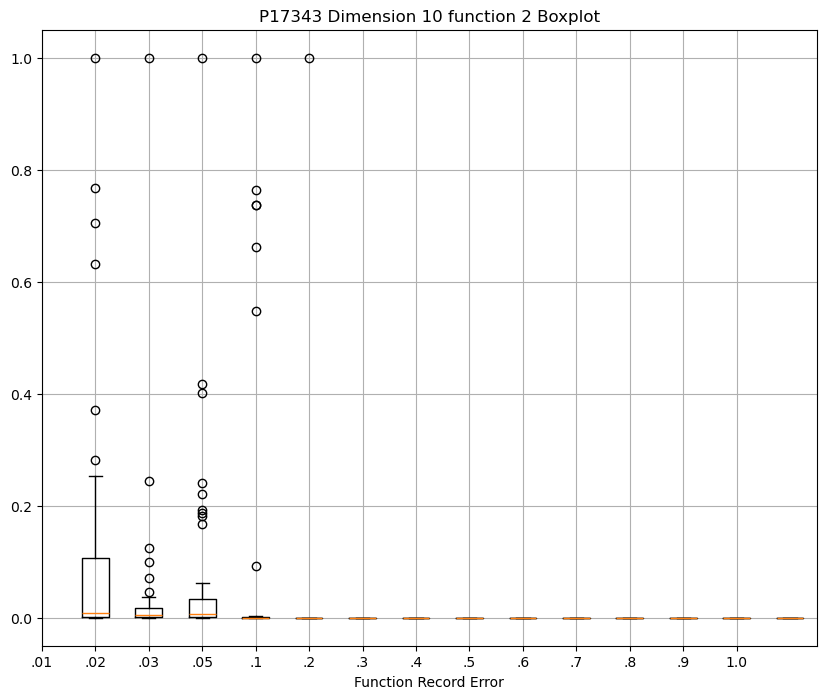

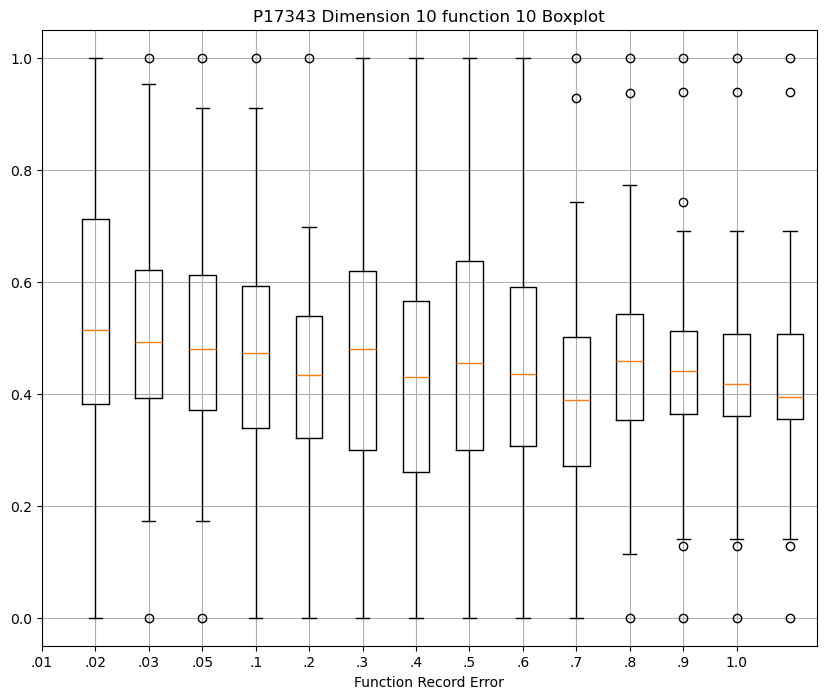

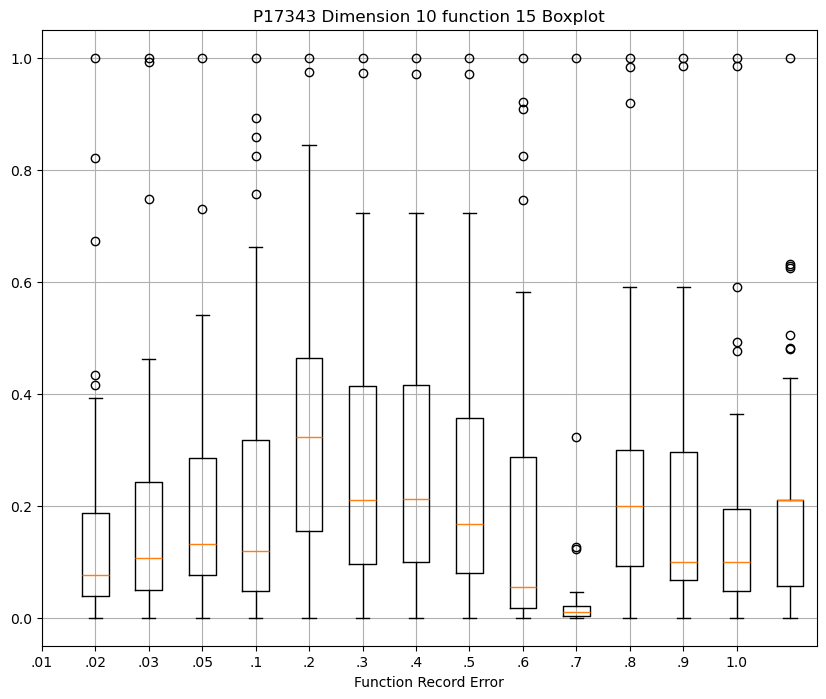

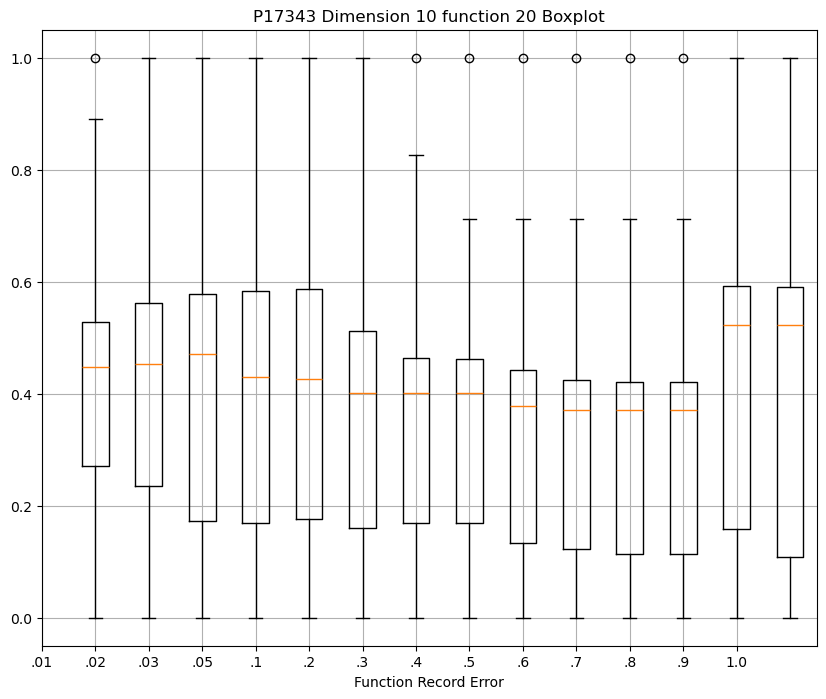

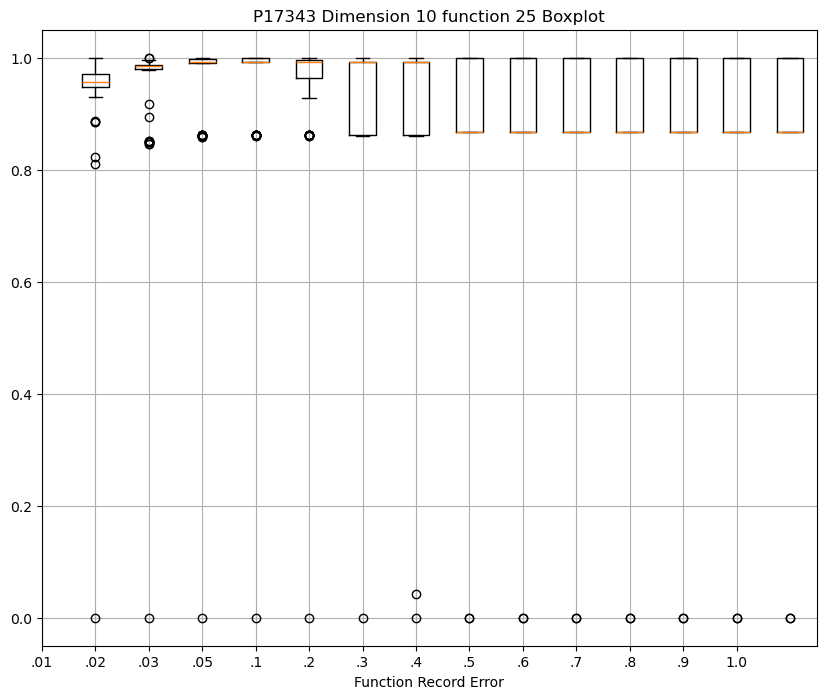

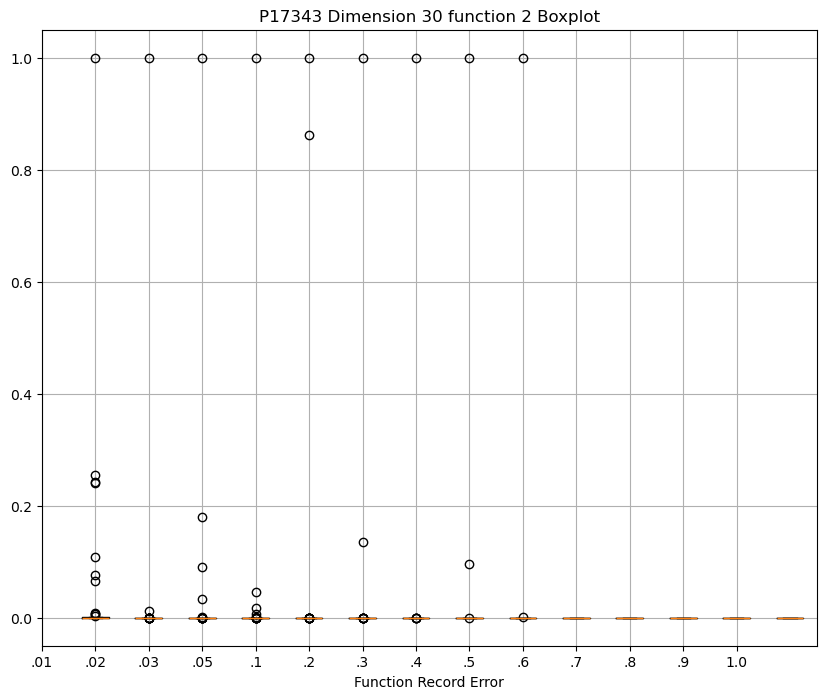

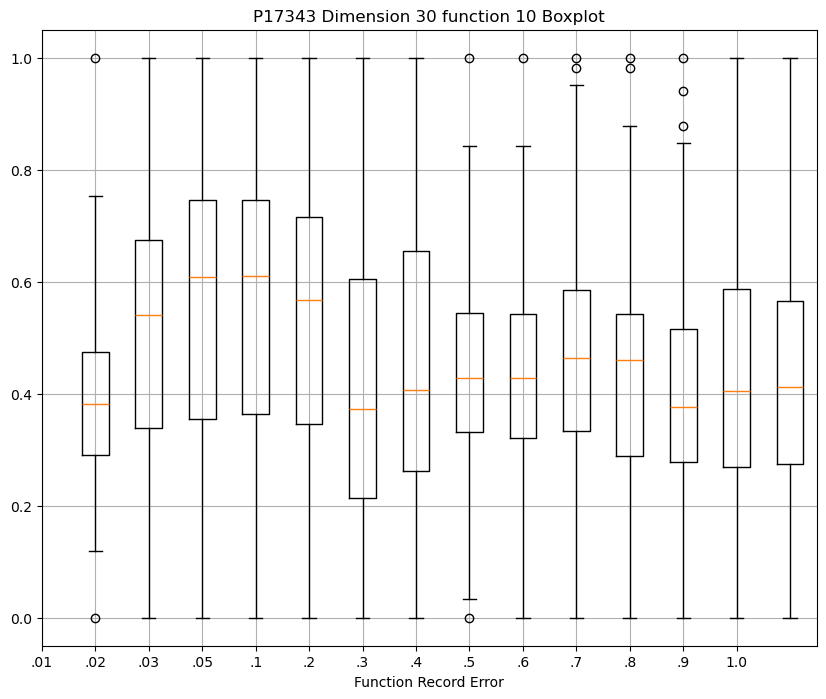

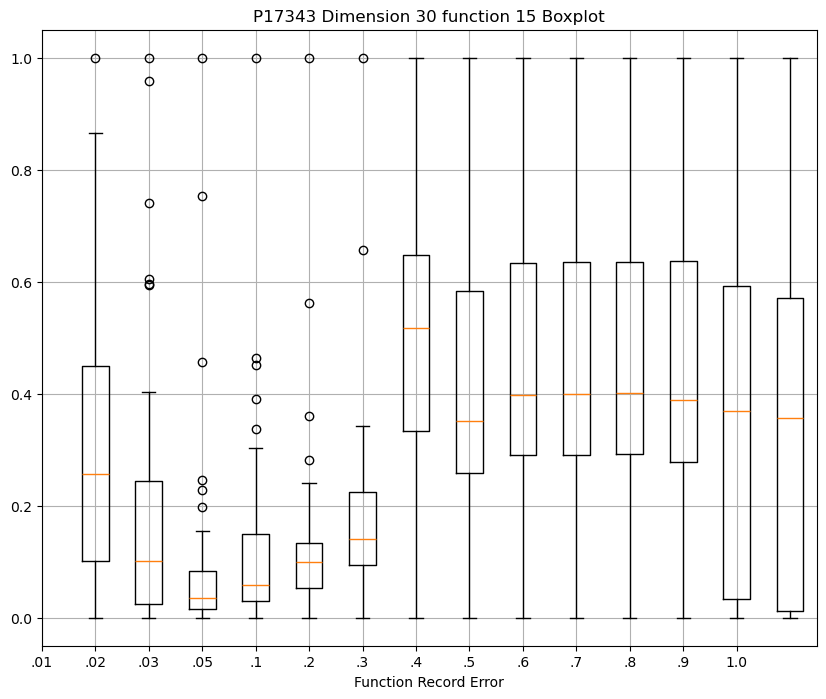

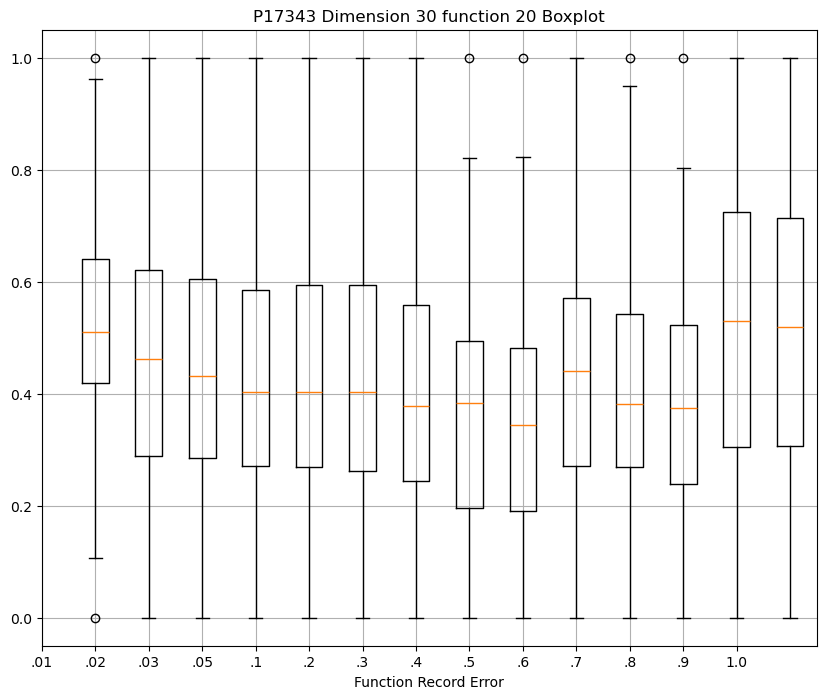

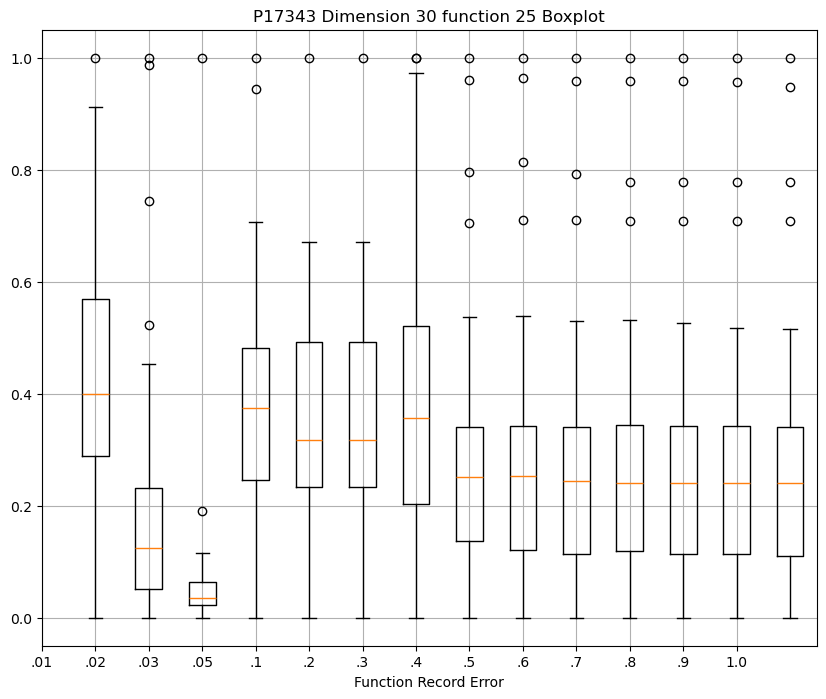

In [71]:
# Calling the function to draw boxplot of data
paper_name_sample = papers_names[3]
dim_sample = dimensions[0:2]
function_sample = [2, 10, 15, 20, 25]

draw_boxplot(paper_name_sample, dim_sample, function_sample)

In [18]:
# Function to graph the boxplot of the functions
def draw_QQplot(paper_name ,dimensions, func):
    for dimension in dimensions:
        file_name = composeFileName(paper_name, dimension, func)
        data_array = convertFileToNumpy(file_name)
        
        for index, record_fun_error in enumerate(record_fun_errors):
            fig = sm.qqplot(data_array[index], line='45')
            plt.title("Paper " + paper_name +" Dimension "+ str(dimension) + " F" + str(func) + " Error "+ str(record_fun_error))   
            plt.grid(True)
            plt.show()

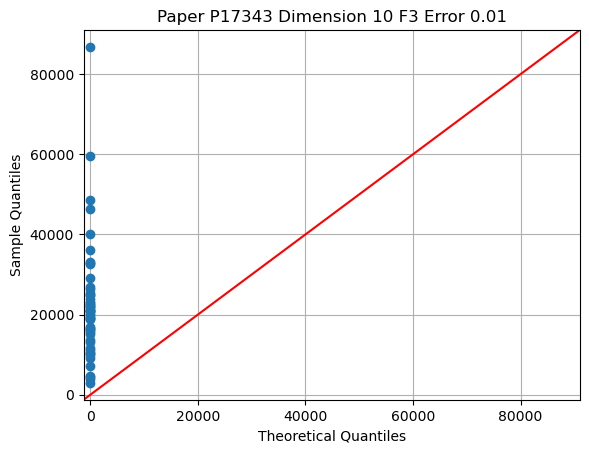

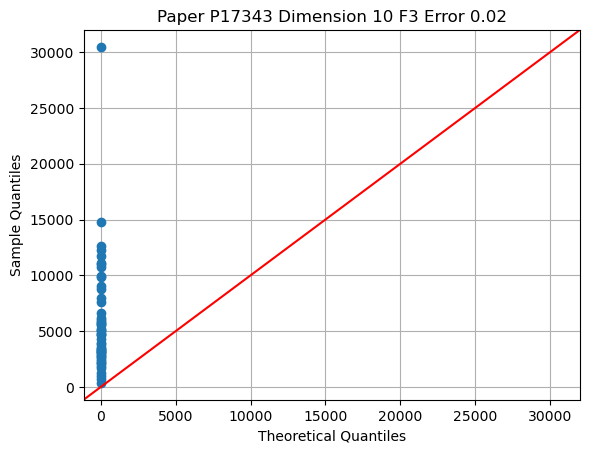

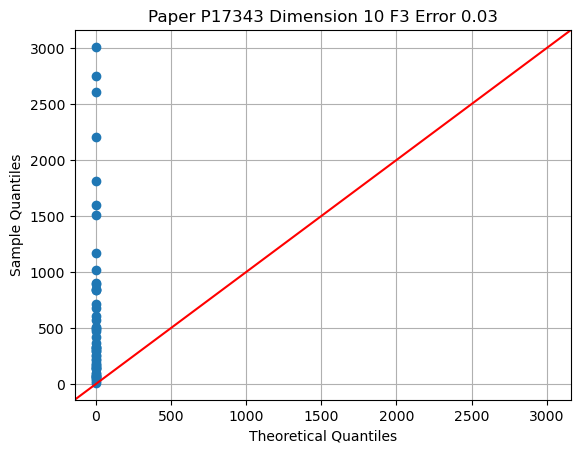

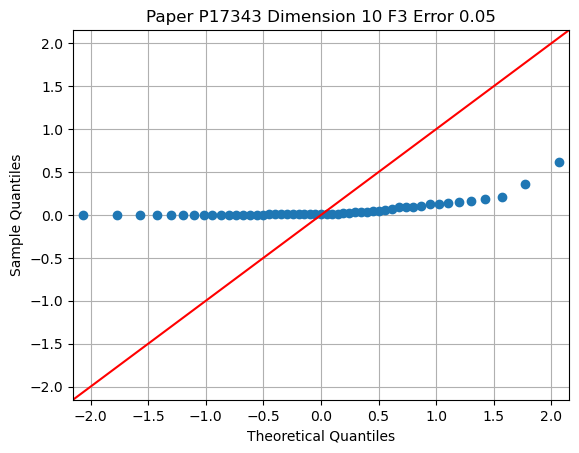

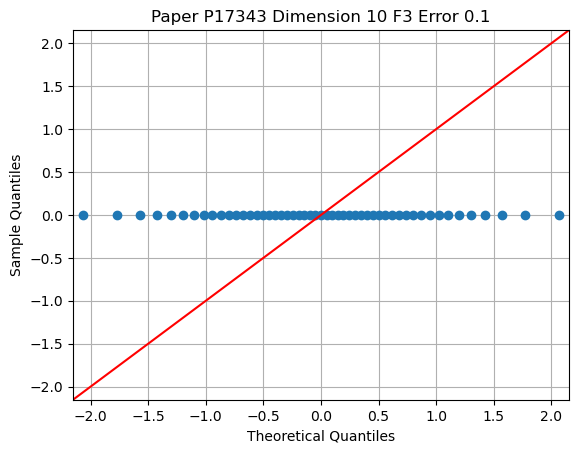

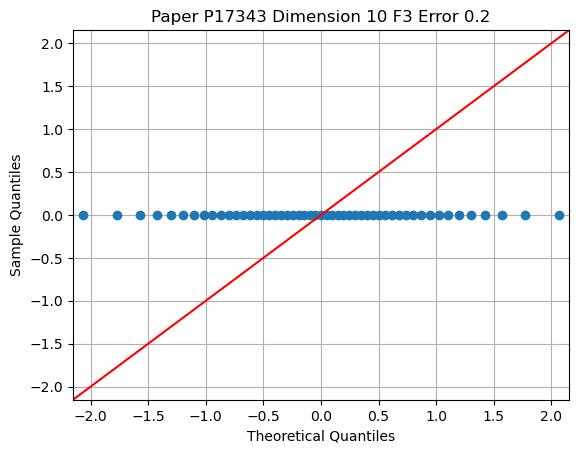

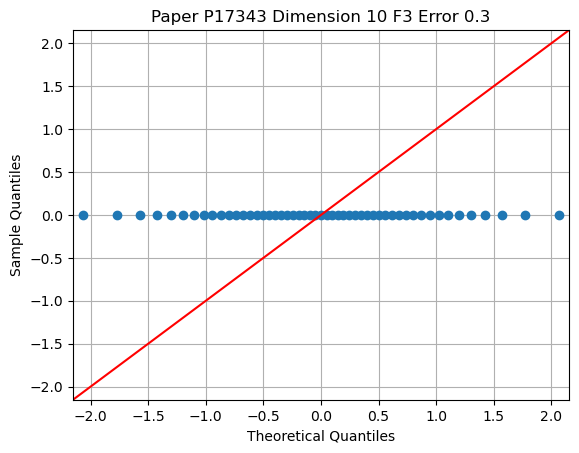

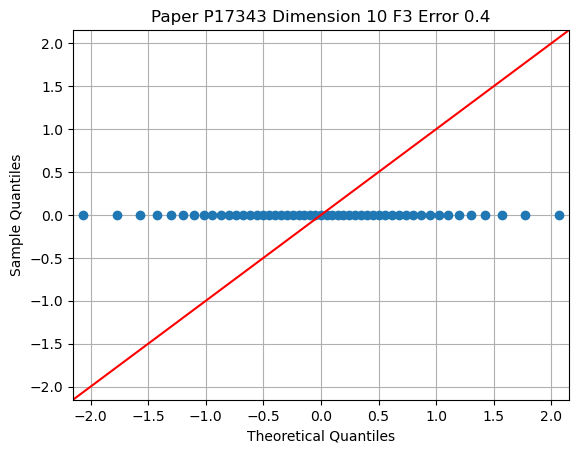

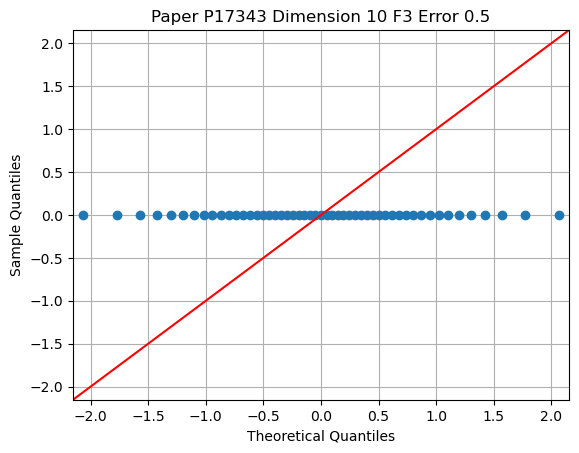

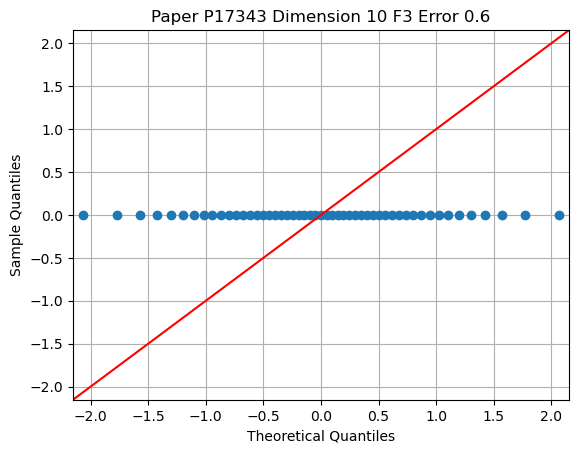

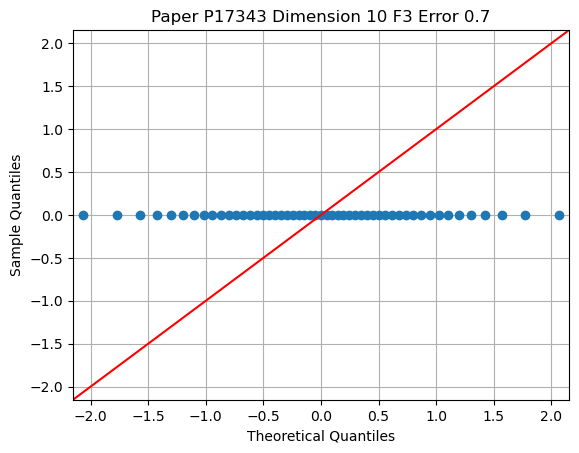

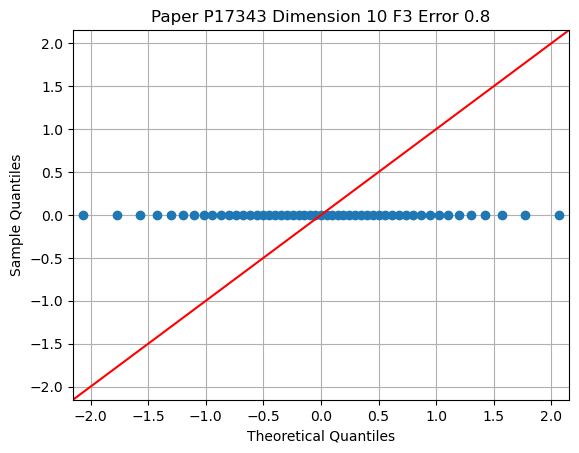

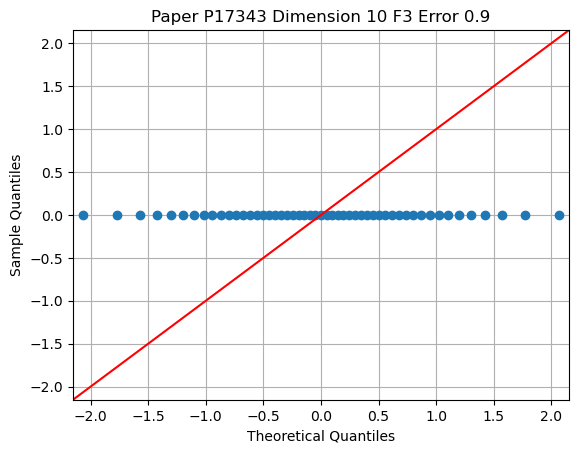

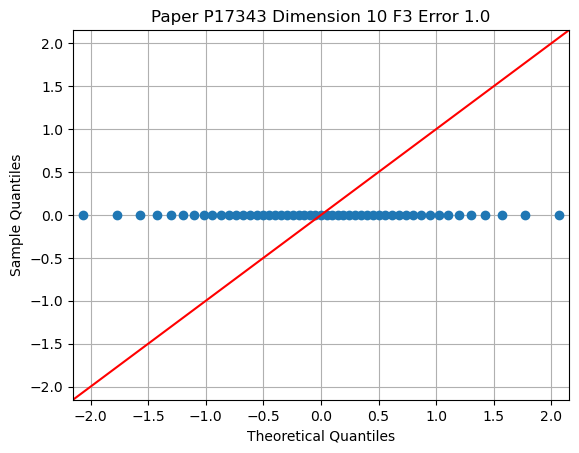

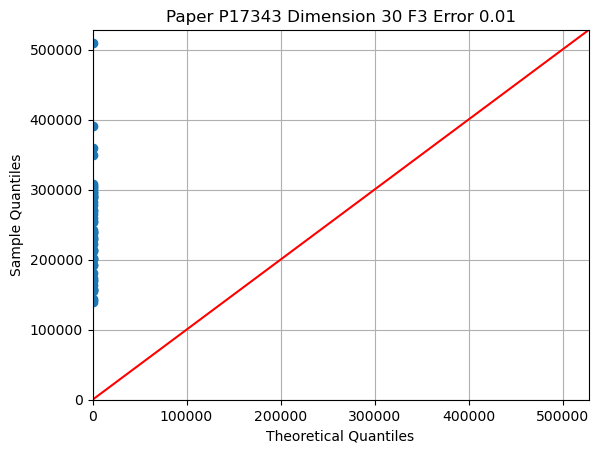

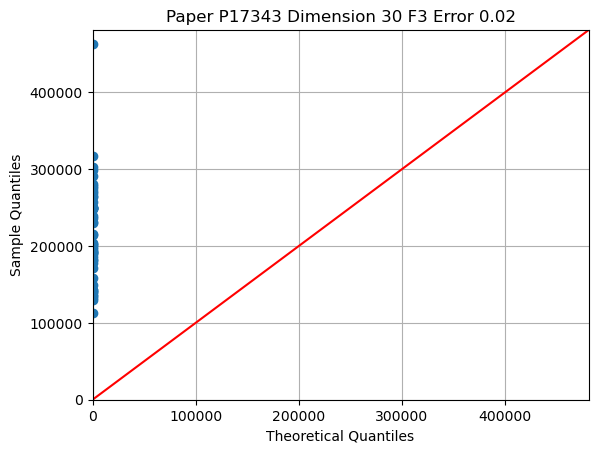

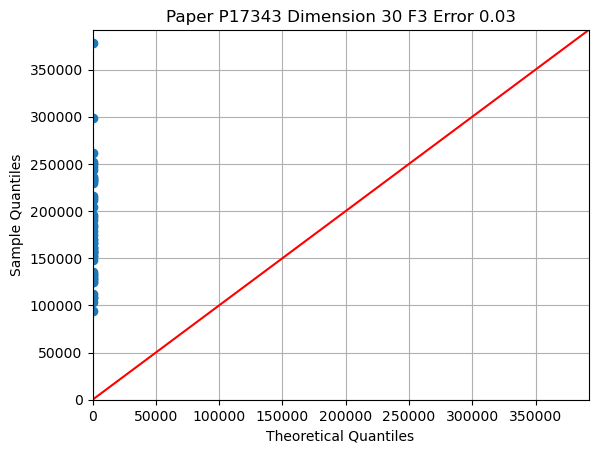

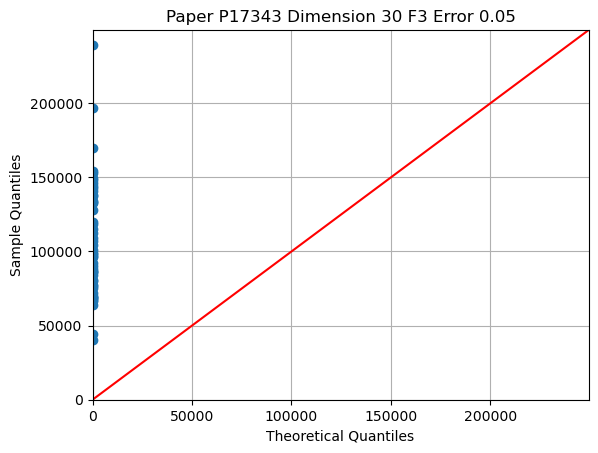

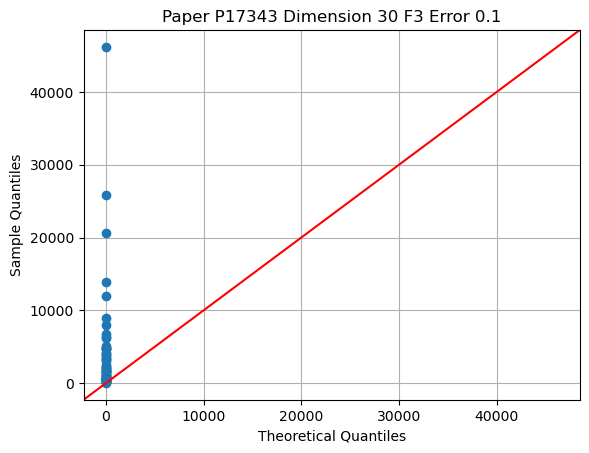

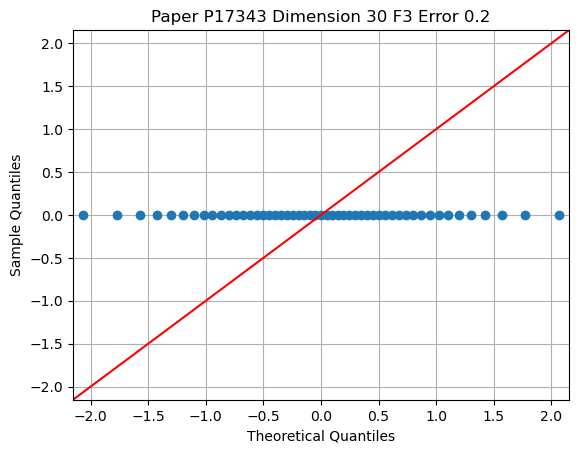

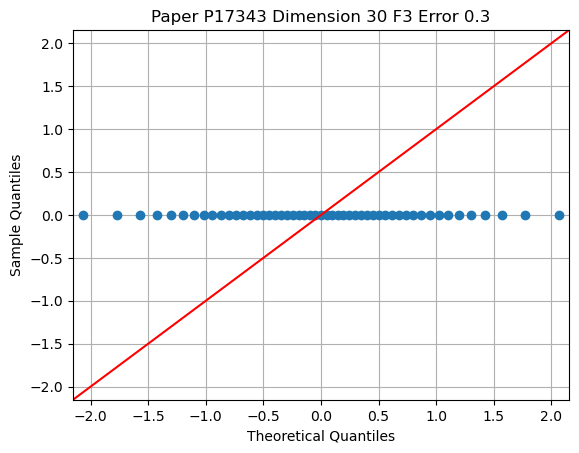

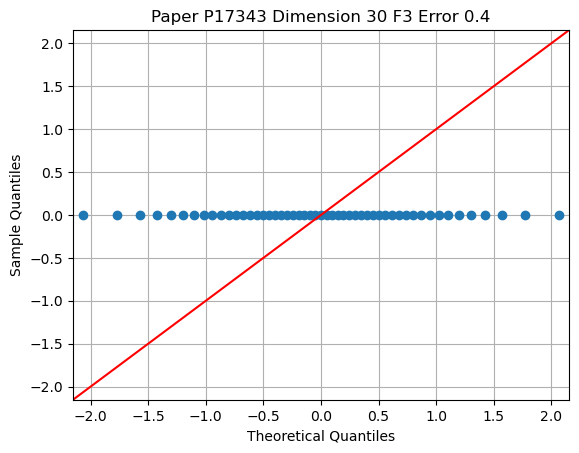

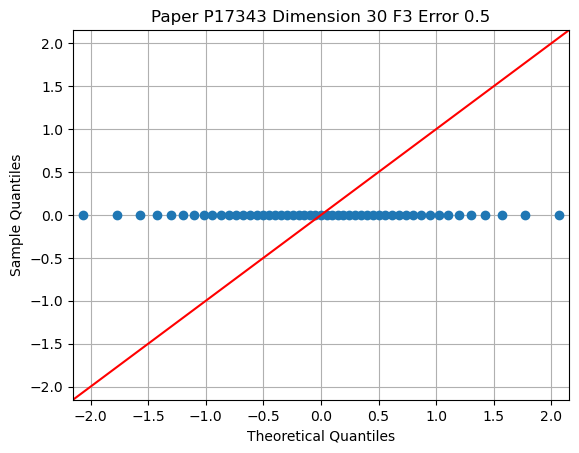

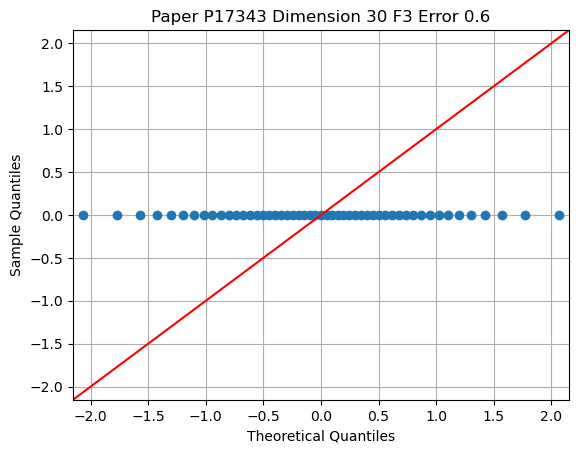

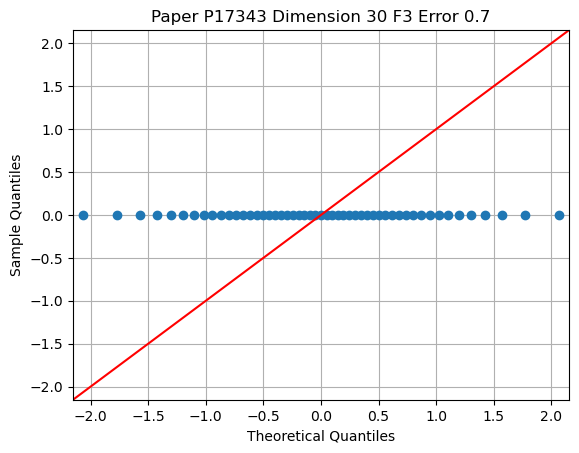

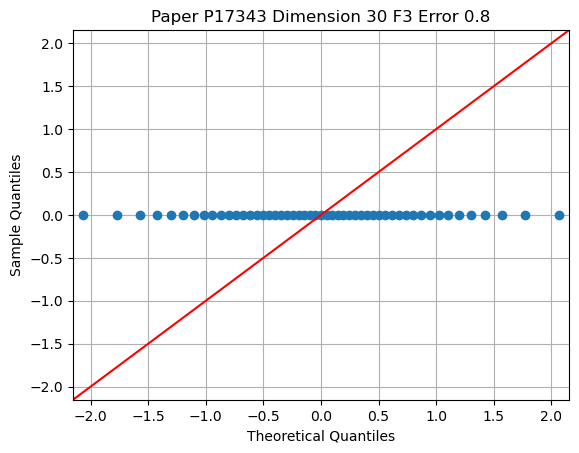

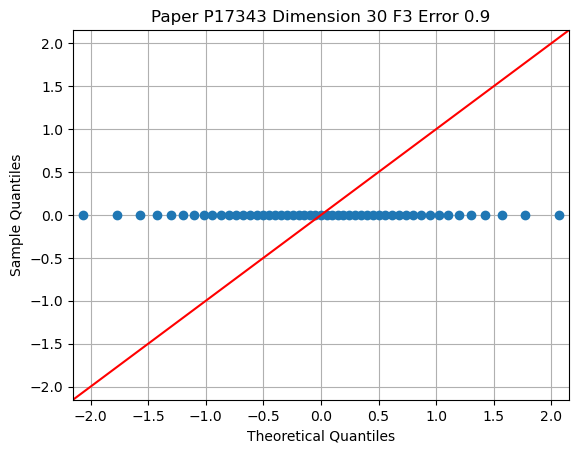

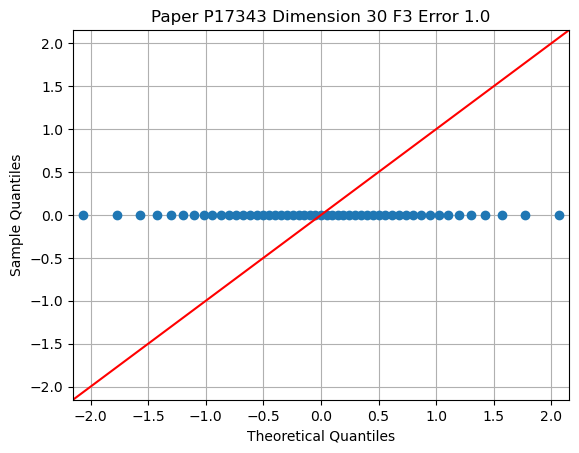

In [19]:

# Calling the function to draw boxplot of data
paper_name_sample = papers_names[3]
dimensions_sample = dimensions[0:2]
draw_QQplot(paper_name_sample, dimensions_sample, 3)

## Data Storing

In [20]:
# Function to store the values of each dimension into sheets
def writeDataToSheets(dimension, workbook, data, columns, index_added):
    '''Function to write the inner dimension run-errors into files'''
    global record_fun_errors
    for record_fun_error in record_fun_errors:
        # create a sheet for this run_error and write the data of this record_fun_error to sheet
        df = data[dimension][record_fun_error][columns]
        df.to_excel(workbook, sheet_name=str(record_fun_error), index=index_added)


In [21]:
# Function to store the summary tables into excel files
def storeToExcelFiles(data, file_endings, test, index_added):
    '''
    Creates the files of summary for each dimension
    :return: Creates Files of summary for each dimension
    '''
    global dimensions

    # Loop over the different dimensions
    for dimension in dimensions:
        # Specify the data to be stored.
        if test == "wilcoxon":
            columns = data[dimension][0.01].columns[0:5]
        else:
            columns = data[dimension][0.01].columns

        # Create Excel file for the dimension
        file = "dataSummaryFiles\\" + "D" + str(dimension) + "_" + file_endings + ".xlsx"
        workbook = pd.ExcelWriter(file, engine="xlsxwriter")
        # Call function to write to the file
        writeDataToSheets(dimension, workbook, data, columns, index_added )
        # close workbook
        workbook.close()
    print("Successfully written data to excel files Dimension_"+ file_endings +".xlsx")


In [22]:
# Call the Storage function  to write summary data into excel files.
storeToExcelFiles(data = dimension_data, file_endings = "DataSummary", test=None, index_added=True)

Successfully written data to excel files Dimension_DataSummary.xlsx


# Data Preparation

In [23]:
# Function to read summary data store in excel files after preprocessing
def prepareSummaryDF():
    '''Return a data dictionary schema:
        {10: { 0.01: DataFrame[function , paper1_mean, paper1_std, ....]
               0.02: .....
                ...
                ... }
         30: {}
         ..
         ..
         }'''
    data_dic = {}
    for dimension in dimensions:
        temp_dic = {}
        # Open the dimension Excel file
        file = "dataSummaryFiles\\" + "D" + str(dimension) + "_DataSummary.xlsx"

        # Open the file and store it in the file
        with pd.ExcelFile(file) as file_ref:
            for record_error in record_fun_errors:
                # Read Each sheet into its correspondent index and assign dataframe to the reference
                temp_dic[record_error] = pd.read_excel(file_ref, str(record_error), index_col="function")
            # Store entire record errors dictionary into dimension reference
            data_dic[dimension] = temp_dic

    return data_dic

In [24]:
# Create Dimension Dictionary Schema
summary_data = prepareSummaryDF()

In [25]:
# Checking for accurate reading
summary_data[10][.01]

,P17315_mean,P17315_std,P17321_mean,P17321_std,P17322_mean,P17322_std,P17343_mean,P17343_std,P17051_mean,P17051_std,...,P17543_mean,P17543_std,P17544_mean,P17544_std,P17260_mean,P17260_std,P17411_mean,P17411_std,P17447_mean,P17447_std
function,,,,,,,,,,,,,,,,,,,,,
f1,4.601045e+09,1.337141e+09,2.328090e+09,7.011825e+08,1.240036e+09,3.488064e+08,5.348634e+07,5.730360e+07,4.140250e+09,1.161053e+09,...,1.030215e+09,5.200348e+08,2.473422e+09,9.645586e+08,6.563688e+06,3.890647e+07,4.380655e+09,1.536068e+09,6.789469e+09,1.838650e+09
f2,5.802840e+10,9.144115e+10,3.331031e+10,1.854509e+11,4.205881e+02,1.644383e+02,7.856280e+07,1.490304e+08,4.888480e+10,5.834297e+10,...,1.311512e+09,3.796204e+09,1.775866e+10,2.871924e+10,9.843374e+06,2.515644e+07,4.751026e+10,6.784796e+10,1.112591e+11,2.172195e+11
f3,2.219993e+04,6.261321e+03,1.481077e+04,4.936999e+03,1.362076e+04,4.724072e+03,2.241050e+04,1.444521e+04,1.947441e+04,5.523363e+03,...,1.790984e+04,6.145219e+03,1.806141e+04,6.475638e+03,1.270294e+04,4.988022e+03,2.037720e+04,6.240070e+03,2.033631e+04,7.153730e+03
f4,2.861153e+02,9.739833e+01,1.718990e+02,5.994297e+01,1.028135e+02,2.829790e+01,1.413721e+01,1.217817e+01,2.838470e+02,1.000388e+02,...,9.309524e+01,4.903946e+01,1.683249e+02,5.716670e+01,2.872098e+01,3.743638e+01,3.337764e+02,1.188255e+02,5.185299e+02,2.055591e+02
f5,8.651451e+01,1.311320e+01,7.209060e+01,1.158216e+01,6.022536e+01,8.455969e+00,5.689066e+01,1.582452e+01,8.312716e+01,9.421180e+00,...,4.681597e+01,9.919919e+00,7.520156e+01,1.196438e+01,3.669020e+01,1.181883e+01,8.745284e+01,1.196098e+01,8.785202e+01,1.446903e+01
f6,5.037912e+01,7.056564e+00,4.019724e+01,5.483341e+00,2.990734e+01,4.570832e+00,1.989771e+01,1.171375e+01,4.792830e+01,8.404597e+00,...,2.028886e+01,6.746969e+00,3.894164e+01,7.710050e+00,2.246824e+01,1.012512e+01,4.870383e+01,6.846008e+00,4.811307e+01,8.700992e+00
f7,1.872683e+02,2.825422e+01,1.373544e+02,1.740693e+01,9.845628e+01,1.091356e+01,6.676598e+01,9.104932e+00,1.681345e+02,1.630581e+01,...,1.012936e+02,2.227167e+01,1.360244e+02,1.856935e+01,1.160235e+02,3.885247e+01,1.733843e+02,2.645822e+01,1.834252e+02,2.416272e+01
f8,8.172919e+01,8.527048e+00,6.852272e+01,7.464595e+00,5.220124e+01,8.357478e+00,5.314808e+01,1.438159e+01,8.046120e+01,9.081618e+00,...,4.714369e+01,9.529338e+00,6.807051e+01,9.088561e+00,4.310784e+01,1.519173e+01,8.052701e+01,9.928115e+00,7.516772e+01,9.137606e+00
f9,1.293984e+03,3.247551e+02,7.391154e+02,2.070913e+02,4.217232e+02,1.199105e+02,2.049905e+02,3.936951e+02,1.114919e+03,2.846802e+02,...,4.054846e+02,2.091025e+02,6.327065e+02,2.317953e+02,6.899176e+02,3.035074e+02,1.226337e+03,2.990849e+02,1.089757e+03,2.951386e+02


# Freidman Test

## Freidman Test Calculation

We will be using the summary_data imported above

In [26]:
# Import necessary libraries to perform the Freidman Test
from scipy.stats import rankdata # to rank values
from scipy.stats import friedmanchisquare

In [27]:
# Function to rank the values per each row
def rank_values(row):
    ''' Rank the values from smallest at (1) starting to the highest'''
    row = pd.Series(rankdata(row, method="dense"), index=row.index)
    return row

In [28]:
# Function to get the freidman values ( statistic, p-value)
def freidman_statistic_pvalue(data):
    '''Returns the freidman statistic and p-value'''
    fredman_result = friedmanchisquare(*[data[col] for col in data.columns])
    return (fredman_result[0], fredman_result[1])

In [29]:
# Dictionary for freidman test summary
# Create the Freidman Ranking Summary table structure
def create_summary_table_structure():
    ''''Create a dataframe with the summary table structure'''
    global record_fun_errors
    freidman_summary = {}
    for dimension in dimensions:
        cols = ["D" + str(dimension) + "_" + str(error) for error in record_fun_errors]
        summary_columns = ["Algorithm"]  # add columns
        summary_columns.extend(cols)
        friedman_summary_df = pd.DataFrame(columns=summary_columns)
        algorithms = [paper for paper in papers_names]
        algorithms.extend(["statistic", "pvalue"])
        friedman_summary_df["Algorithm"] = algorithms
        friedman_summary_df = friedman_summary_df.set_index("Algorithm")
        freidman_summary[dimension] = friedman_summary_df

    return freidman_summary

In [30]:
# Creating an overall summary of the freidman test summary
freidman_summary = create_summary_table_structure()

In [31]:
# Verify freidman schema created
freidman_summary[30]

,D30_0.01,D30_0.02,D30_0.03,D30_0.05,D30_0.1,D30_0.2,D30_0.3,D30_0.4,D30_0.5,D30_0.6,D30_0.7,D30_0.8,D30_0.9,D30_1.0
Algorithm,,,,,,,,,,,,,,
P17315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P17321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P17322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P17343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P17051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P17420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P17543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P17544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P17260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Function to organize the values
def organize_values(ranks, statistic, pvalue , dimension, record_fun_error):
    '''Adds the values of the ranks to the columns '''
    global freidman_summary
    values = ranks.to_list()
    values.extend([statistic, Decimal(pvalue) ])
    freidman_summary[dimension]["D"+str(dimension)+"_"+str(record_fun_error)] = values

In [33]:
# Obtain the mean columns names as they will only be used in the freidman test
mean_columns = summary_data[10][0.1].columns[summary_data[10][0.1].columns.str.endswith("_mean")]

In [34]:
# Function to perform freidman ranking
def freidman_test(dimension):
    '''Function to perform the freidman test'''
    global mean_columns
    for record_fun_error in record_fun_errors:
        # Obtain the mean values of the dimension
        summary_data[dimension][record_fun_error] = summary_data[dimension][record_fun_error][mean_columns].copy()
        # call function to get statistic and p-value
        statistic, pvalue = freidman_statistic_pvalue(summary_data[dimension][record_fun_error])

        # call function to mask data using ranks
        summary_data[dimension][record_fun_error] = summary_data[dimension][record_fun_error].apply(rank_values, axis=1)

        # Sum the rank values into the dataframe
        rank_sum = summary_data[dimension][record_fun_error].sum(axis=0)
        rank_sum = pd.Series(rank_sum, name="rank_sum")
        summary_data[dimension][record_fun_error] = summary_data[dimension][record_fun_error]._append(rank_sum)
        
        # call function to add ranks filtered to ranks_table
        summary = summary_data[dimension][record_fun_error].iloc[len(summary_data[dimension][record_fun_error]) - 1]
        organize_values(summary, statistic, pvalue, dimension, record_fun_error)

In [35]:
# Call freidman to be applied to all the dimensions
for dimension in dimensions:
    freidman_test(dimension )

In [36]:
# Call the method to store the data into excel files
storeToExcelFiles( data=summary_data, file_endings = "Freidman_TestSummary", test=None, index_added=True)

Successfully written data to excel files Dimension_Freidman_TestSummary.xlsx


In [37]:
# Function to write the total friedman summary to excel files
def writeFreidmanSummaryToExcel(data):
    '''Function to store the overall summary of freidman test'''
    global dimensions
    # Loop over the different dimensions
    file = "dataSummaryFiles\\" + "FriedmanTestSummary.xlsx"
    # Create Excel file for the dimension
    workbook = pd.ExcelWriter(file, engine="xlsxwriter")
    # Loop over dimensions and write the overall result into excel file
    for dimension in dimensions:
        # Call function to write to the file
        data[dimension].to_excel(workbook, sheet_name=str(dimension), index=True)
    
    workbook.close()
    print("Successfully written Friedman test summary to excel files.")


In [38]:
# Write the overall summary to excel file
writeFreidmanSummaryToExcel(freidman_summary)

Successfully written Friedman test summary to excel files.


## Freidman Conclusions

In [39]:
# Show the summary with Statistics and P-values
def get_freidman_summary():
    freidman_summary = {}
    for dimension in dimensions:
        freidman_summary[dimension] = pd.read_excel("dataSummaryFiles\\FriedmanTestSummary.xlsx", sheet_name=str(dimension))
    return freidman_summary

In [40]:

def draw_freidman_summary(dimension):
    df = freidman_summary[dimension]
    df.drop(df.index[-2:], inplace=True)
    df.set_index('Algorithm', inplace=True)
    reversed_df = df.T
    colors = [ "red", "green", "navy", "blue", "purple", "orange",
               "yellow", "teal", 
                "lime", "cyan", "maroon","olive" ]

    # Create subplots with at most 3 columns
    for index, row in reversed_df.iterrows():
        # Create a new figure for each row
        plt.figure(figsize=(16, 8))

        # Plot the row as a bar chart
        row.plot(kind='bar', color=colors)

        # Title and labels
        plt.title('Paper Rankings for Dimension')
        plt.xlabel('Paper')
        plt.ylabel('Ranking')
        plt.xticks(rotation=45)
        plt.legend()

        # Show plot
        plt.tight_layout()
        plt.show()


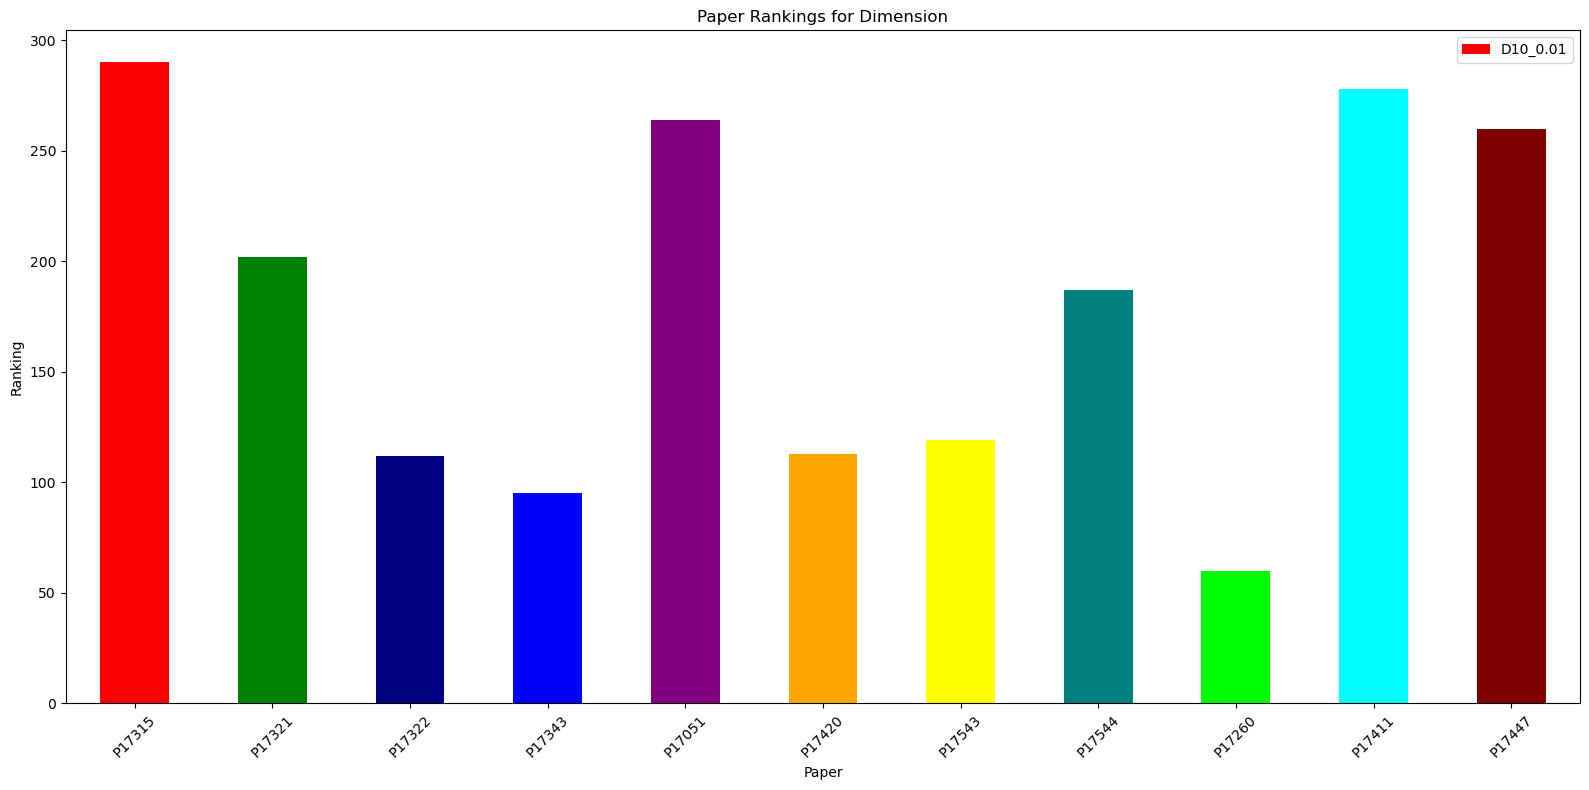

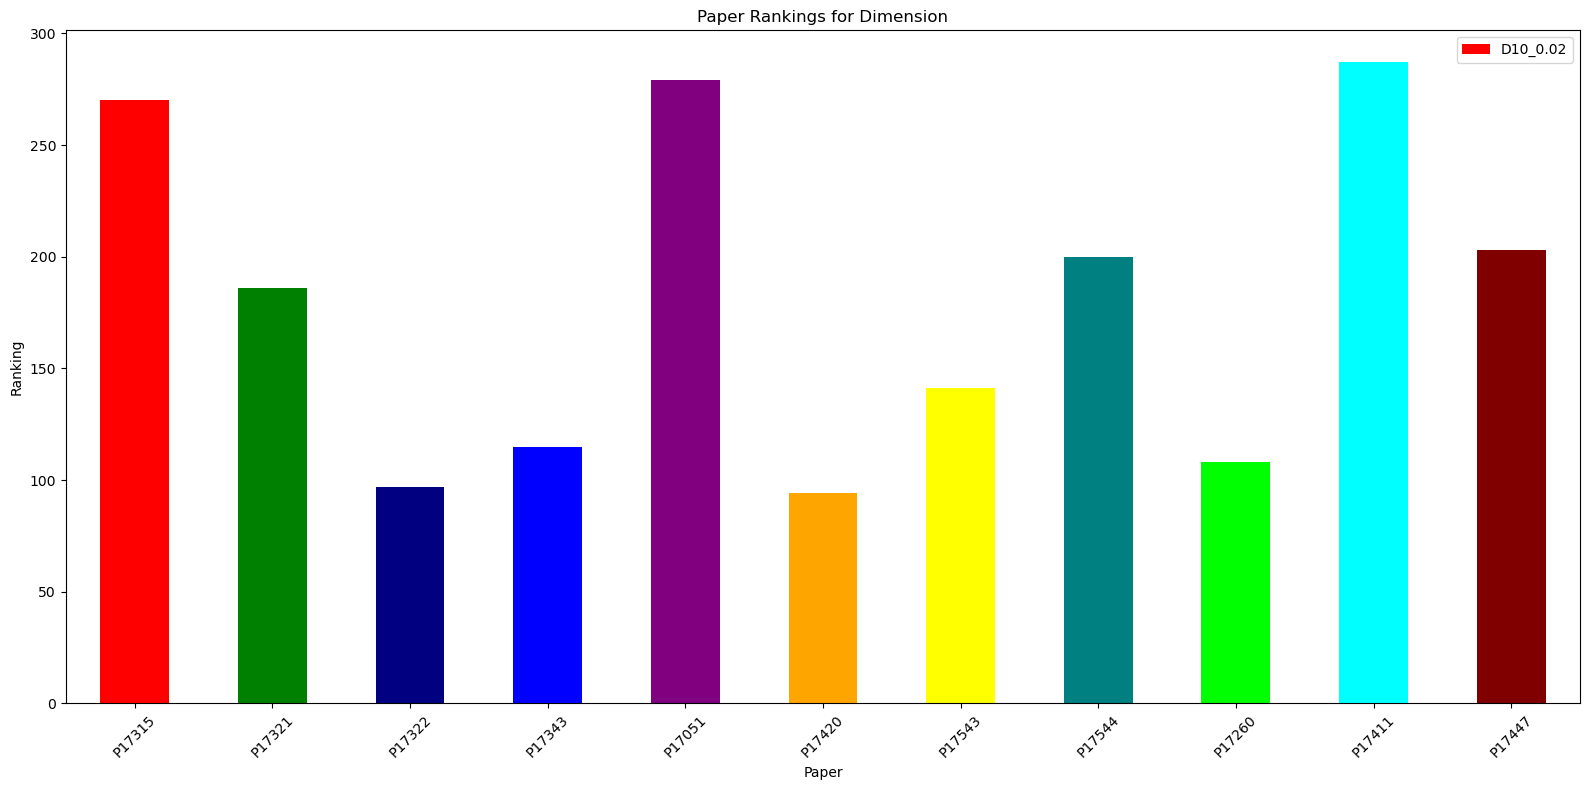

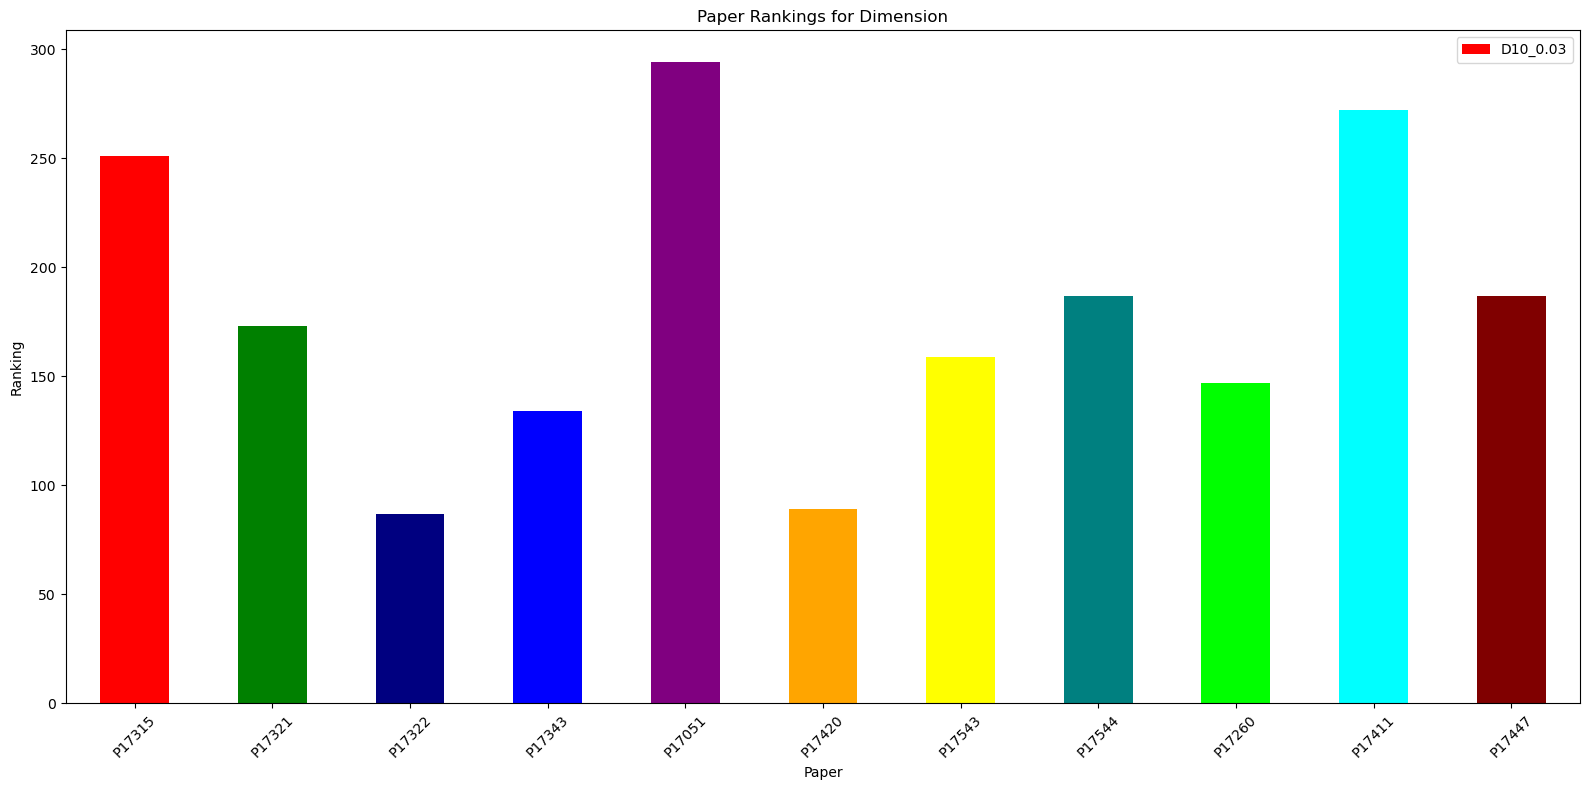

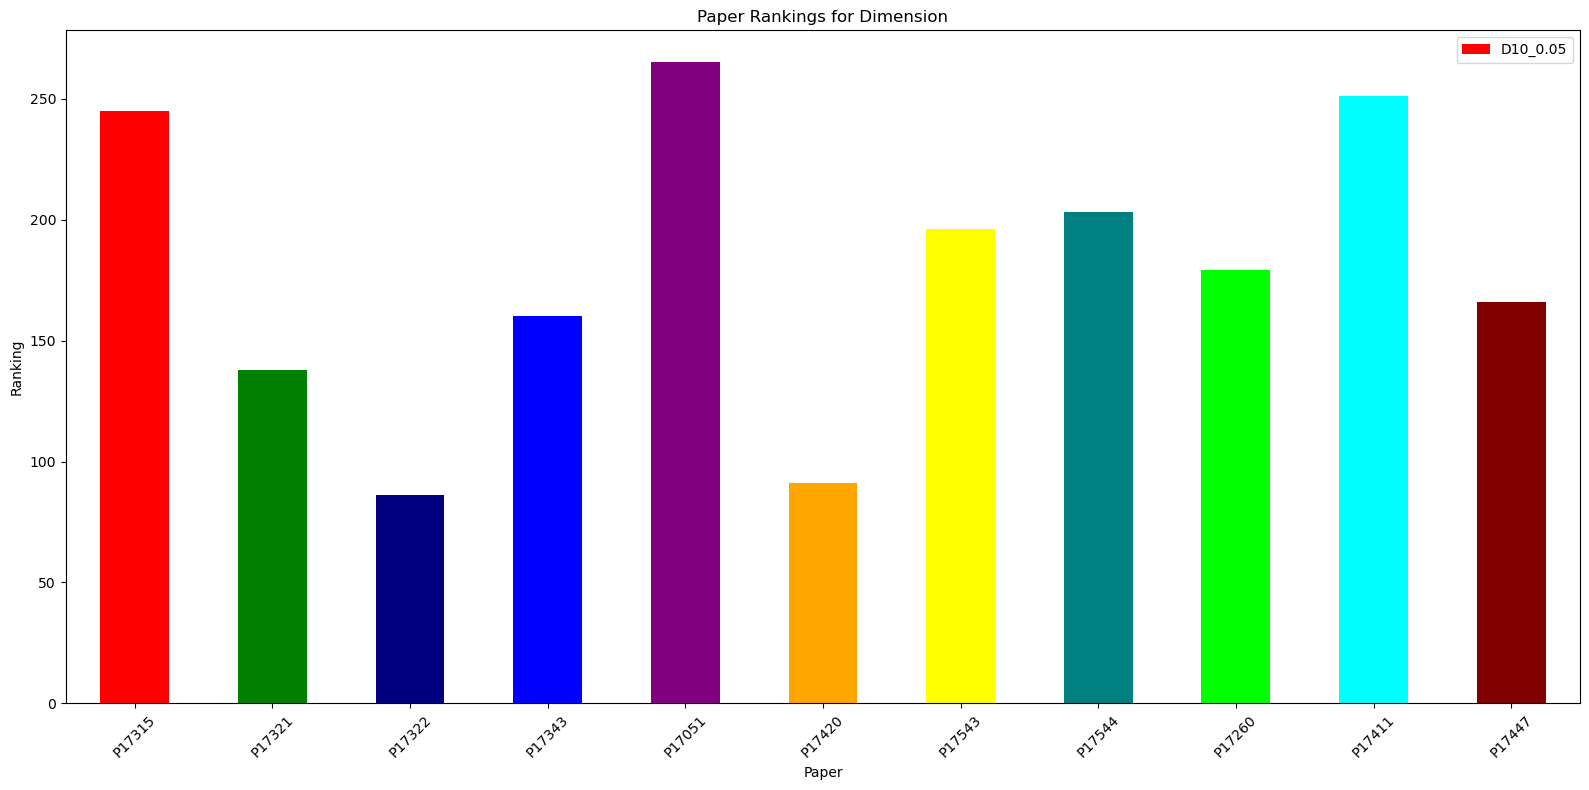

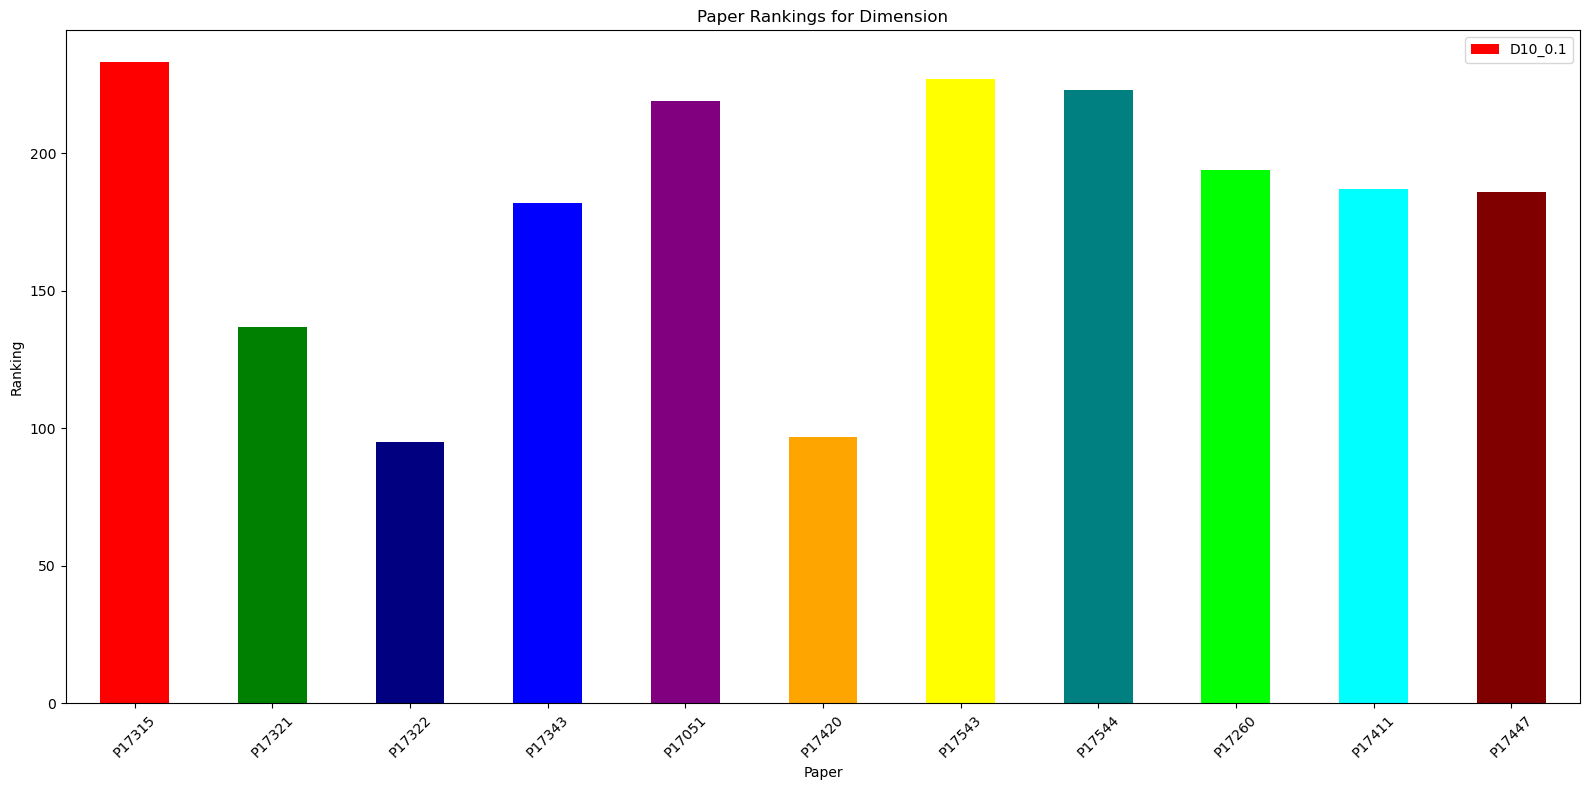

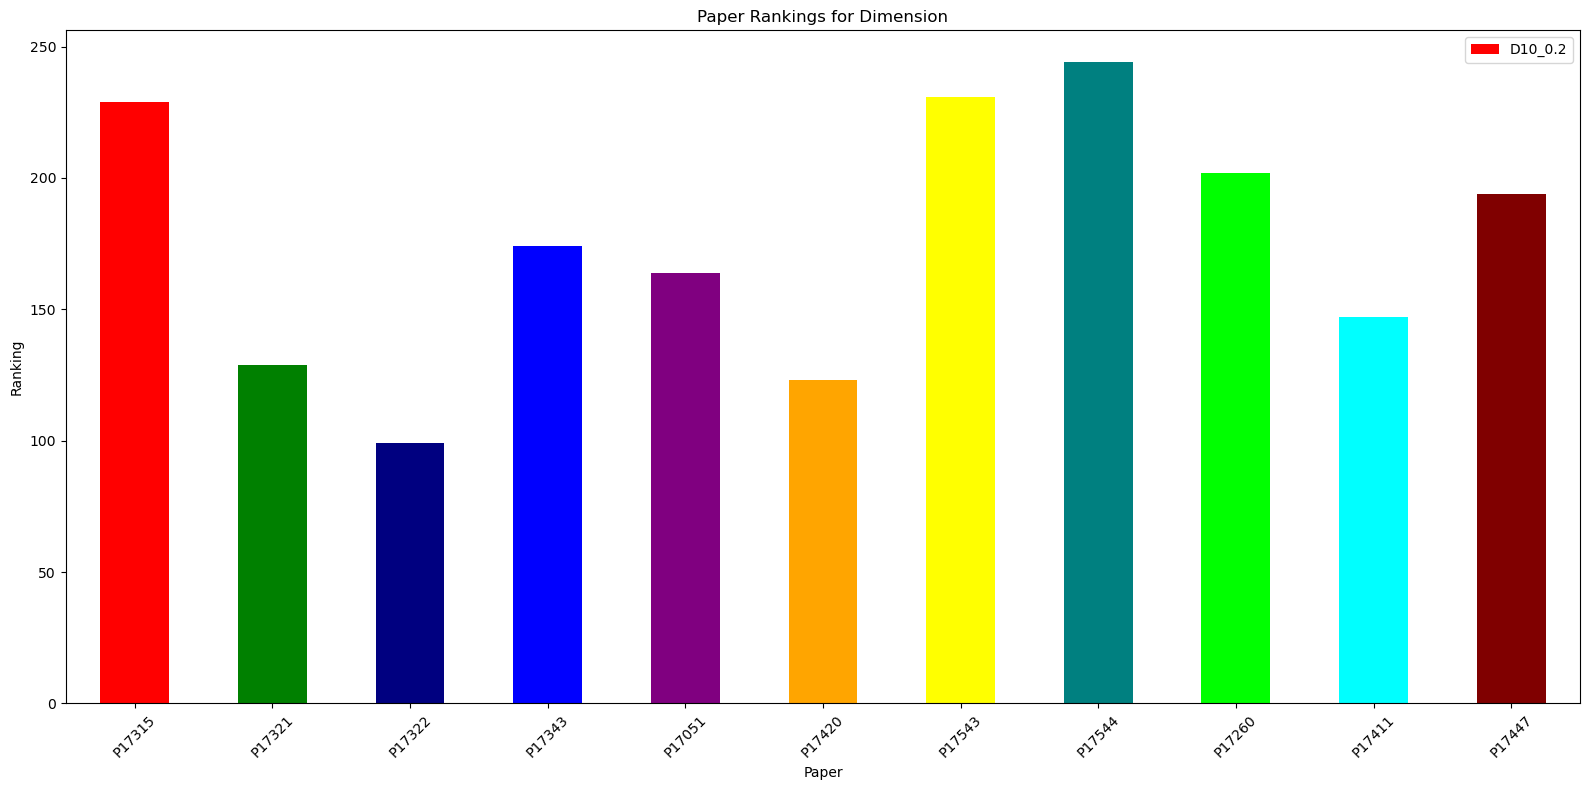

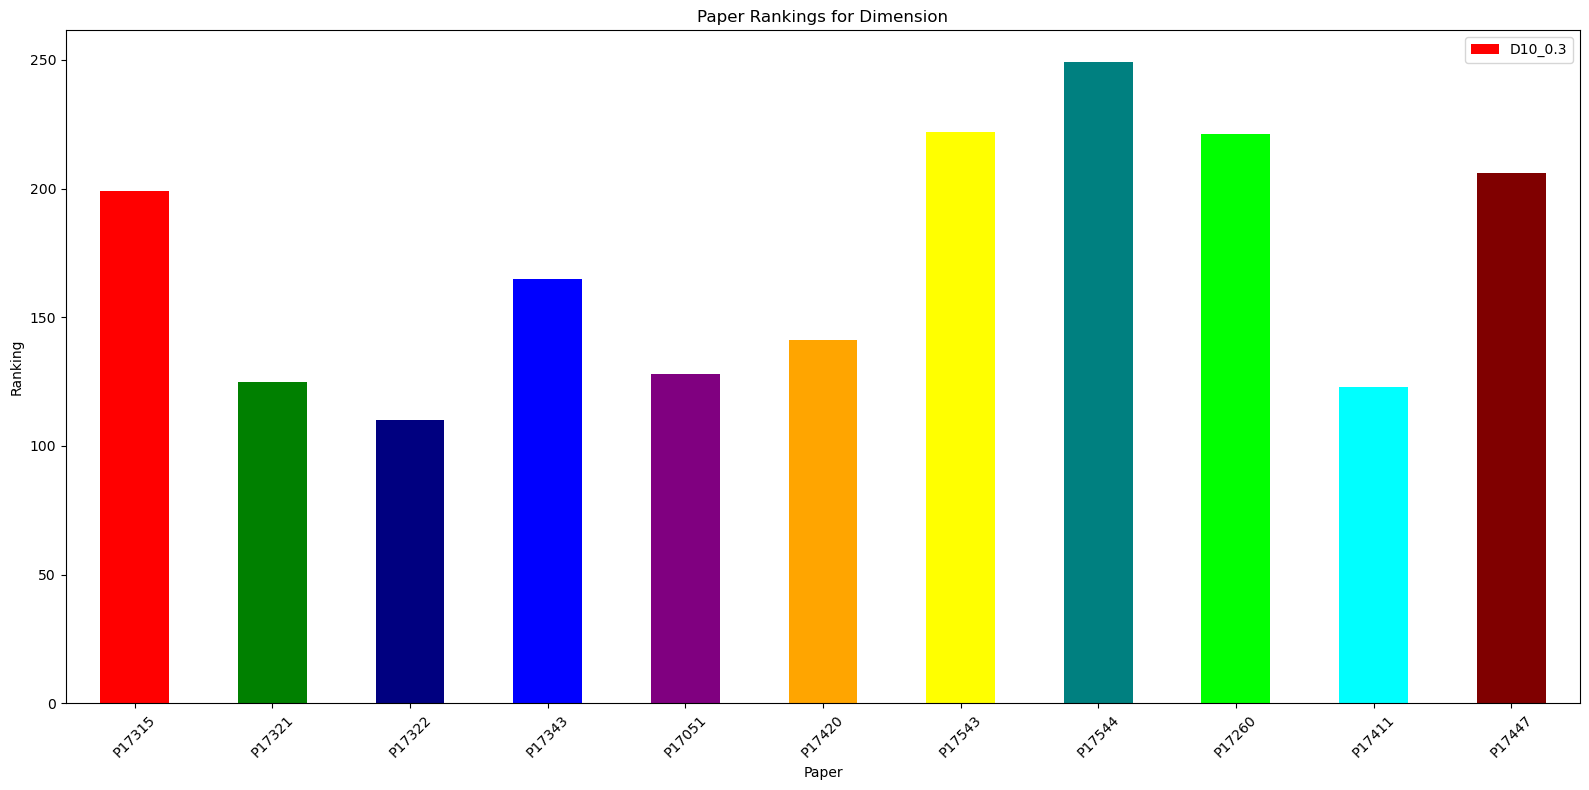

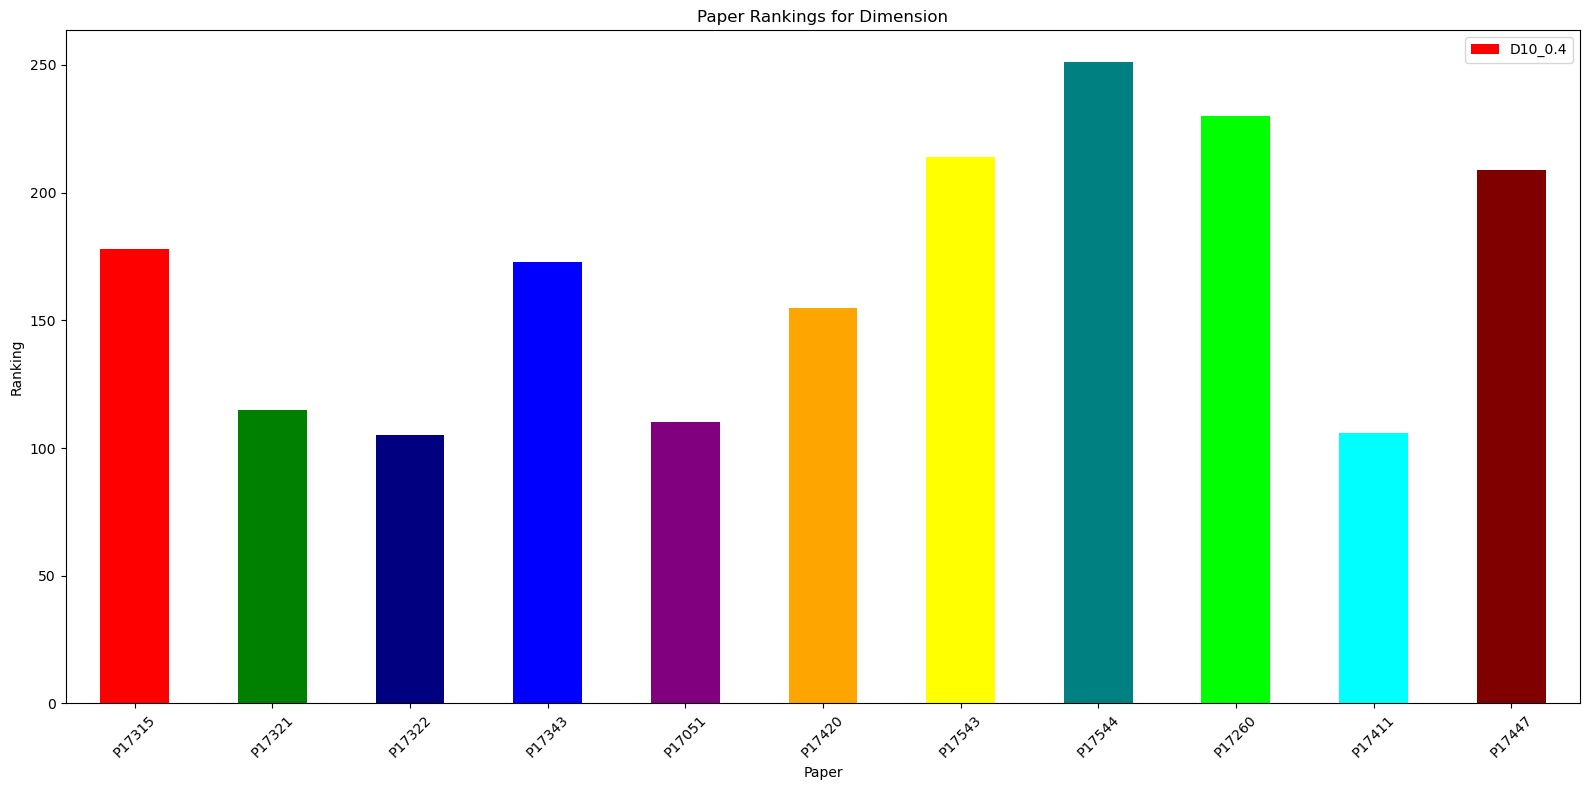

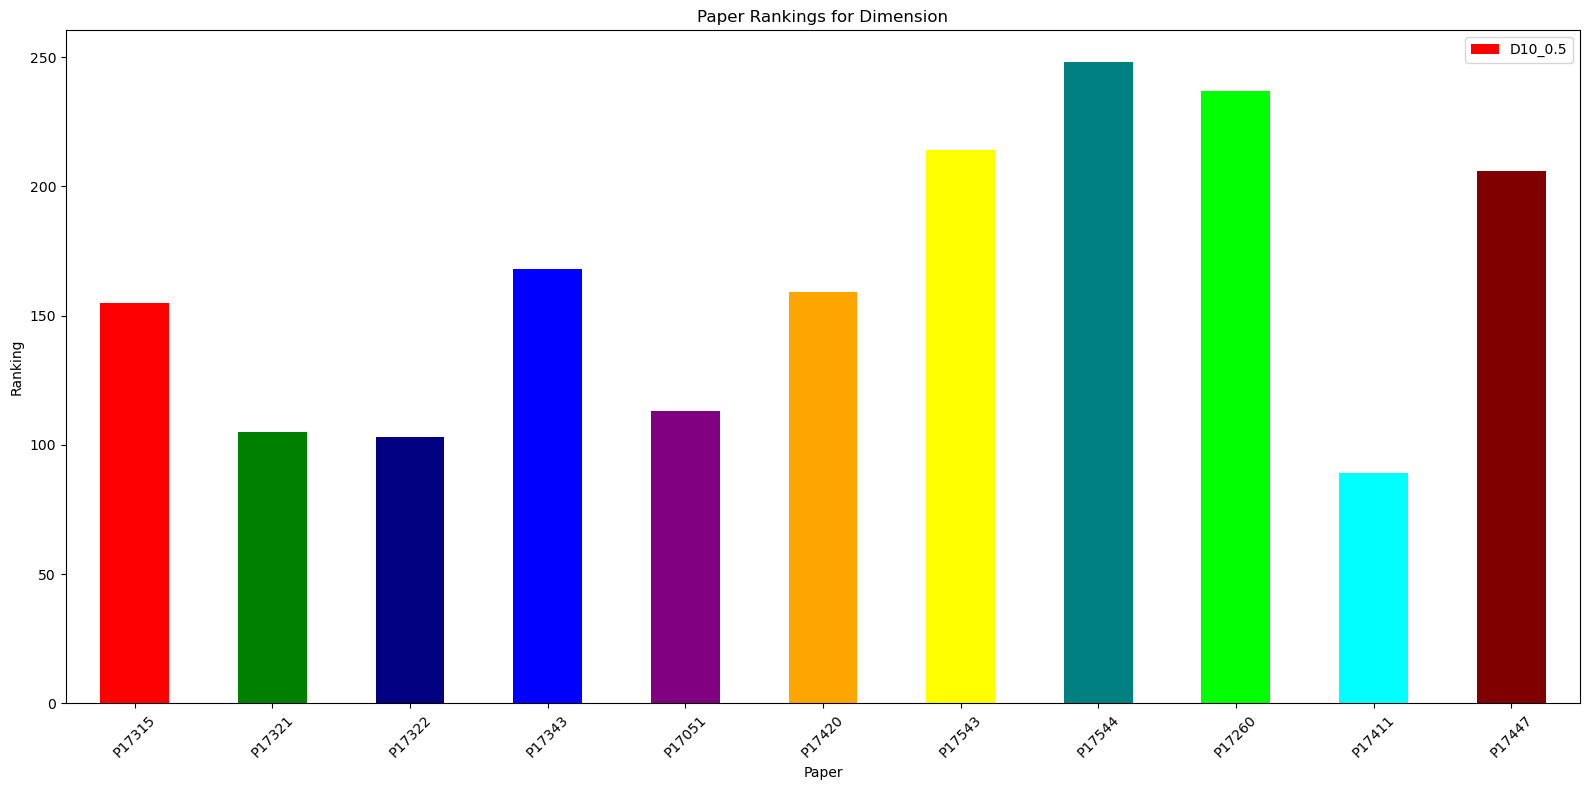

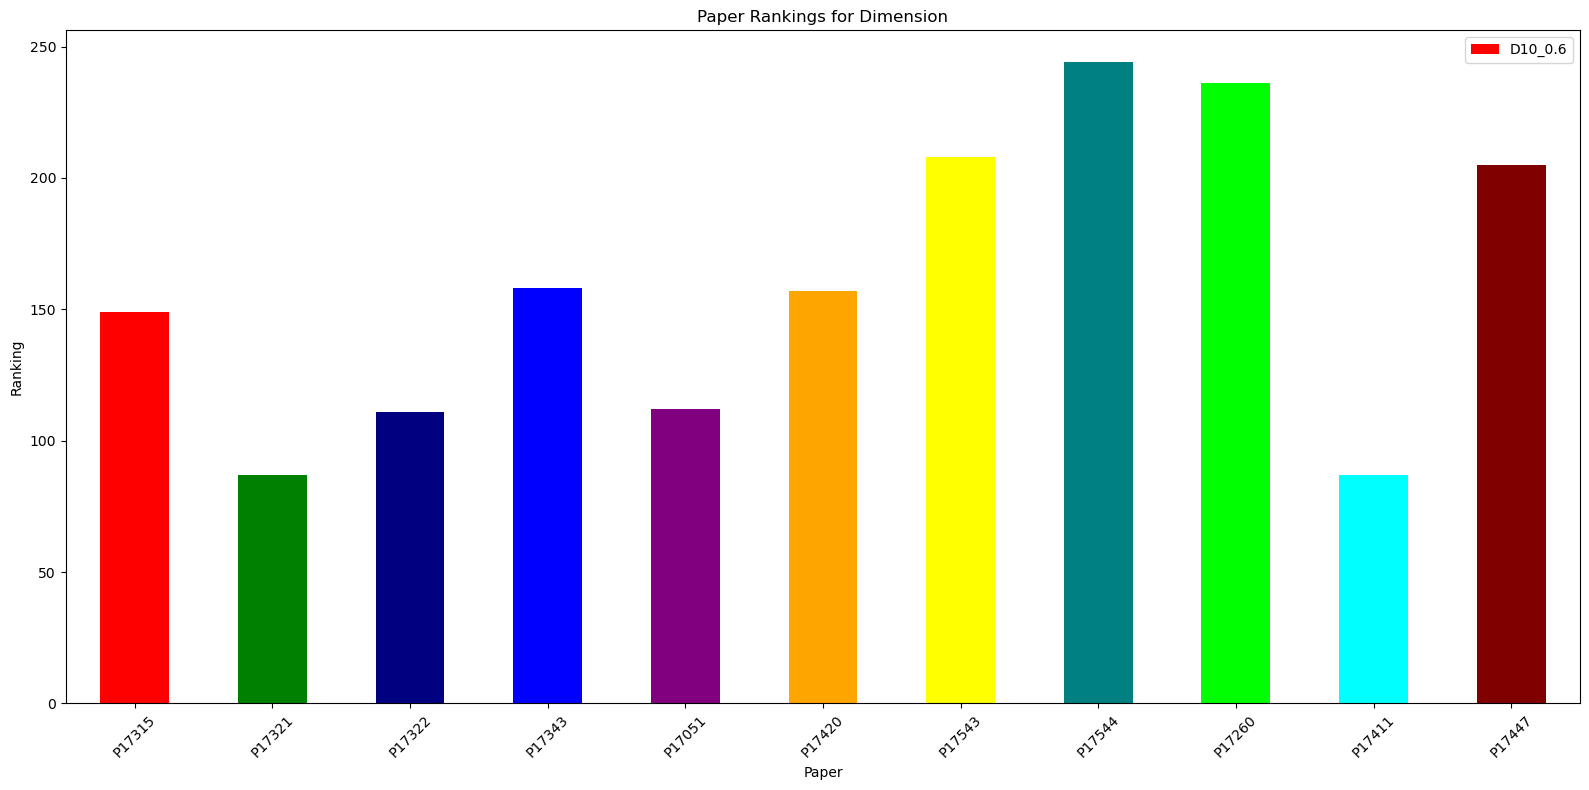

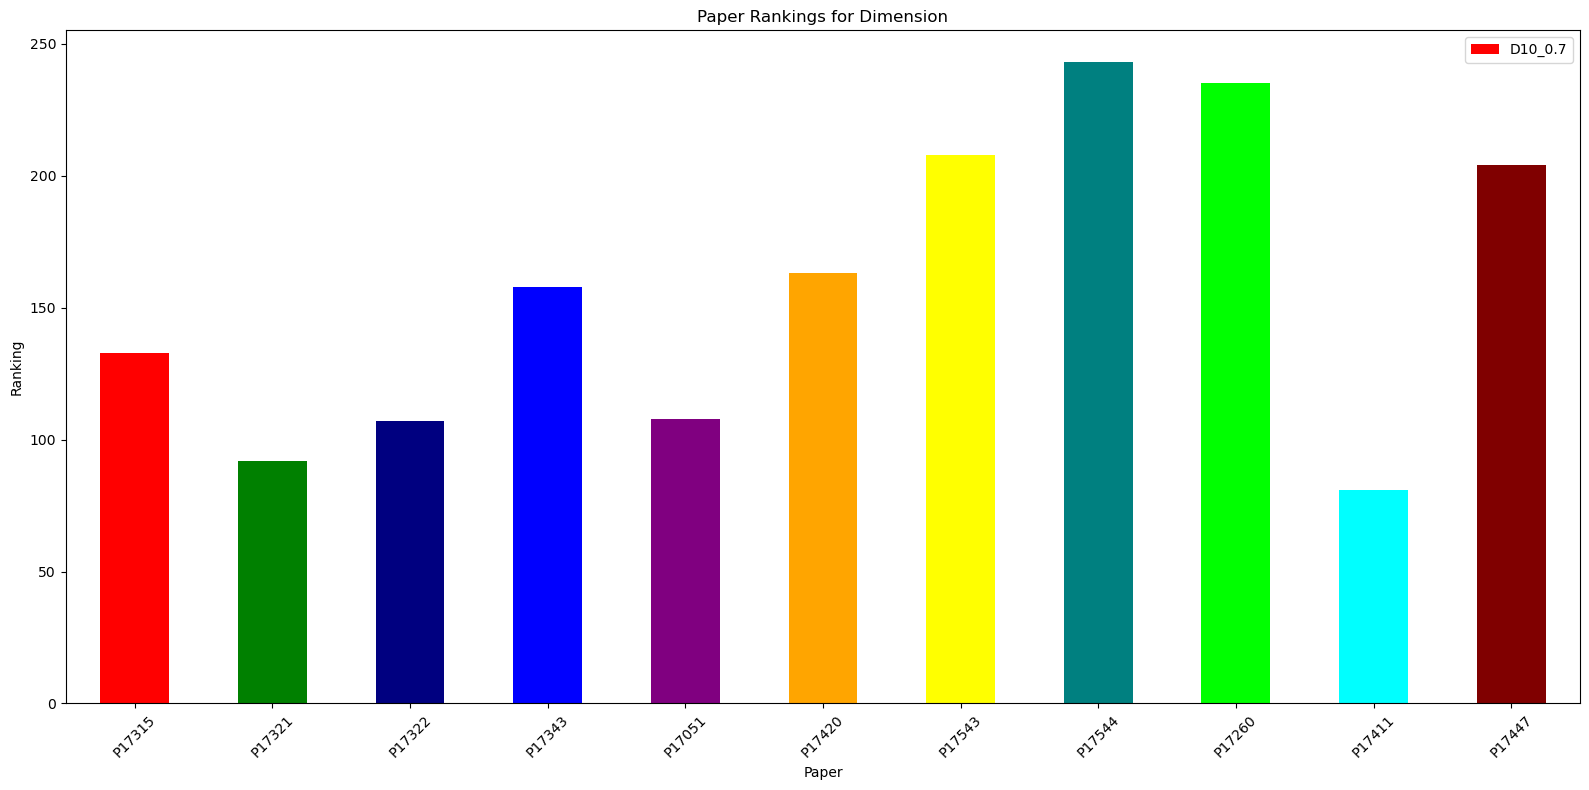

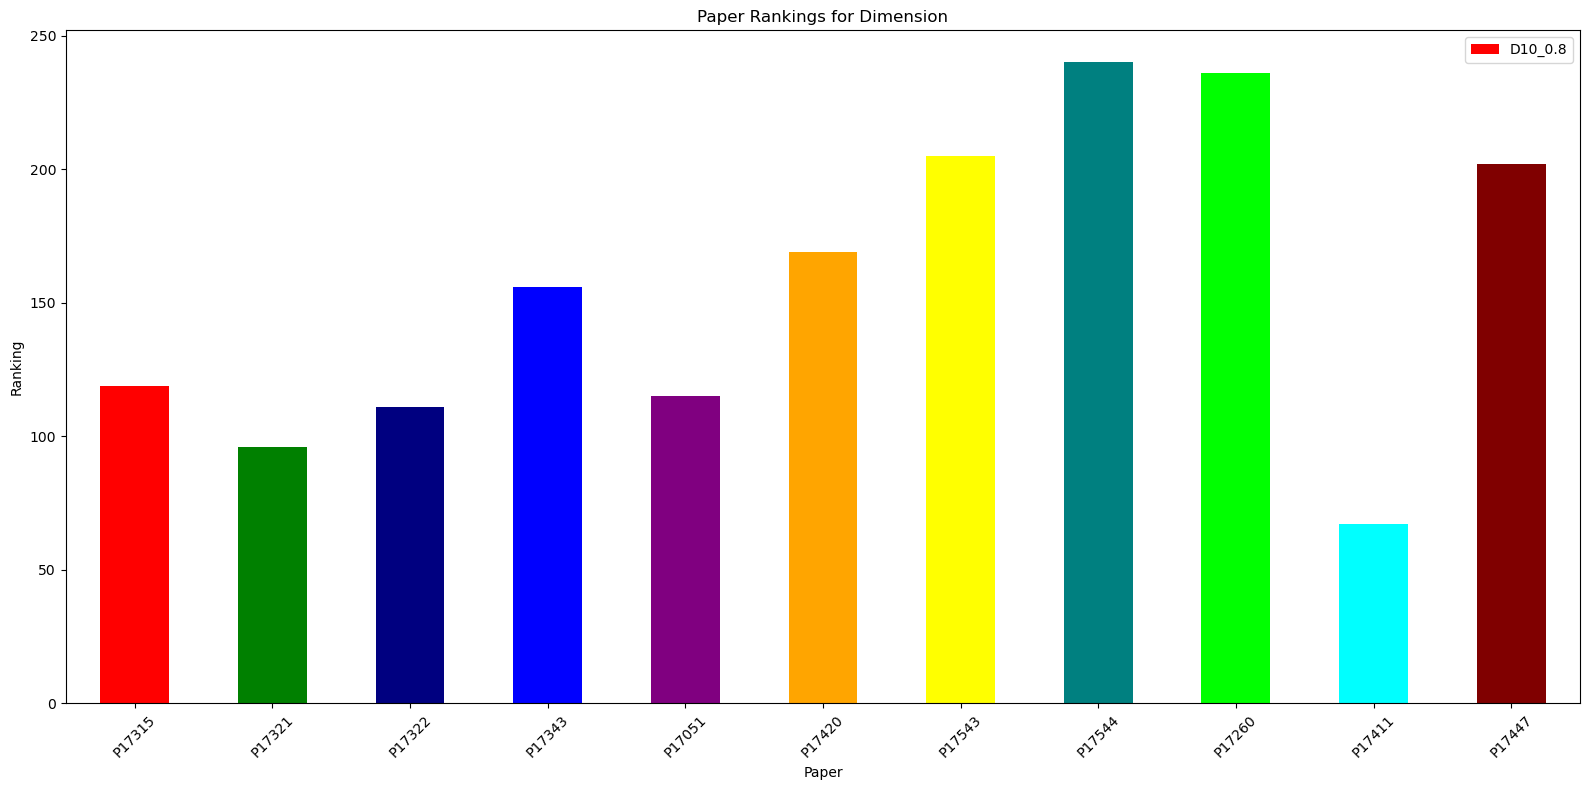

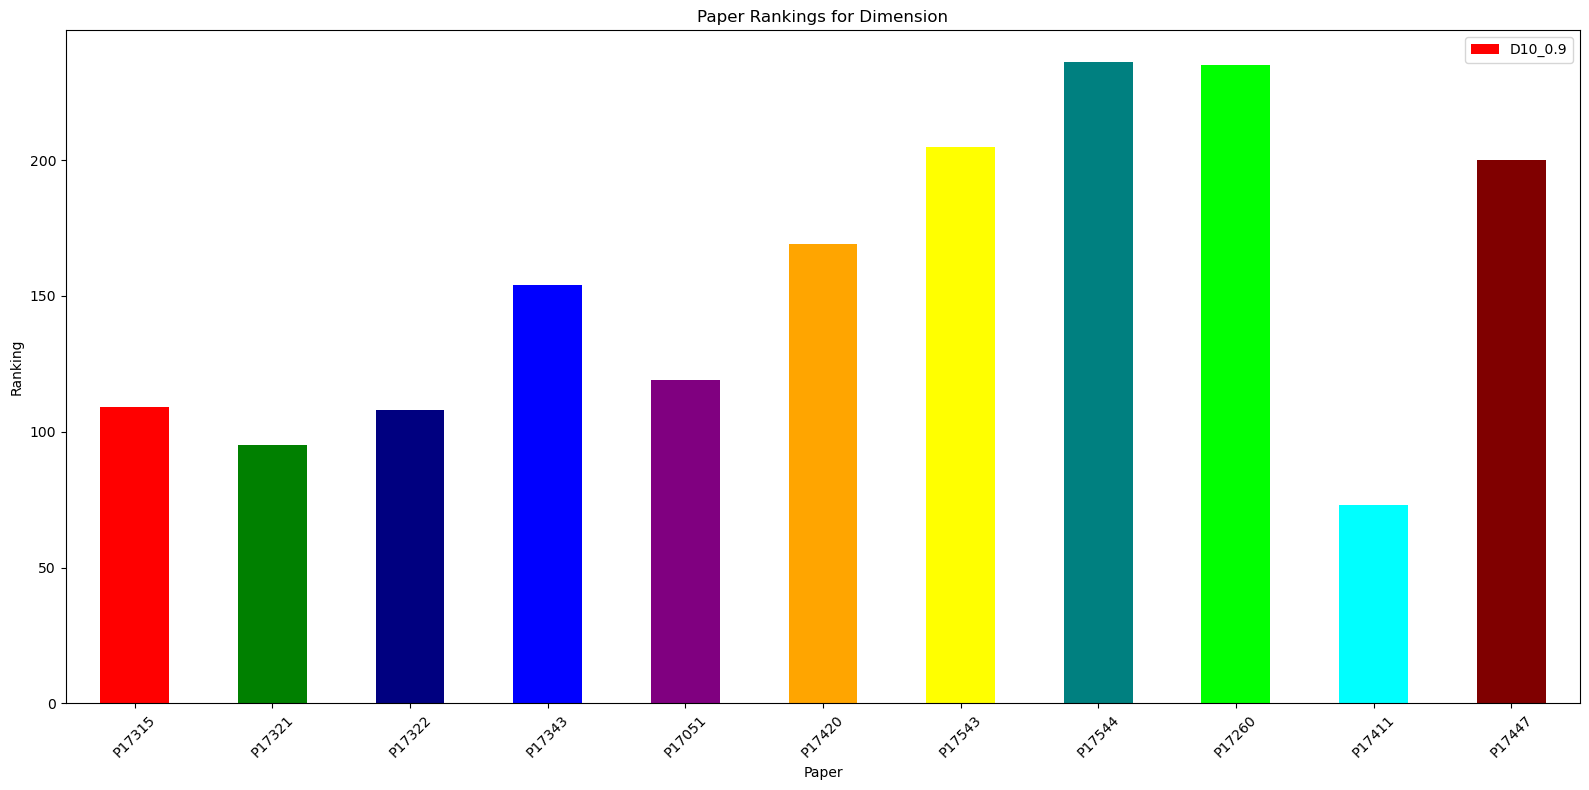

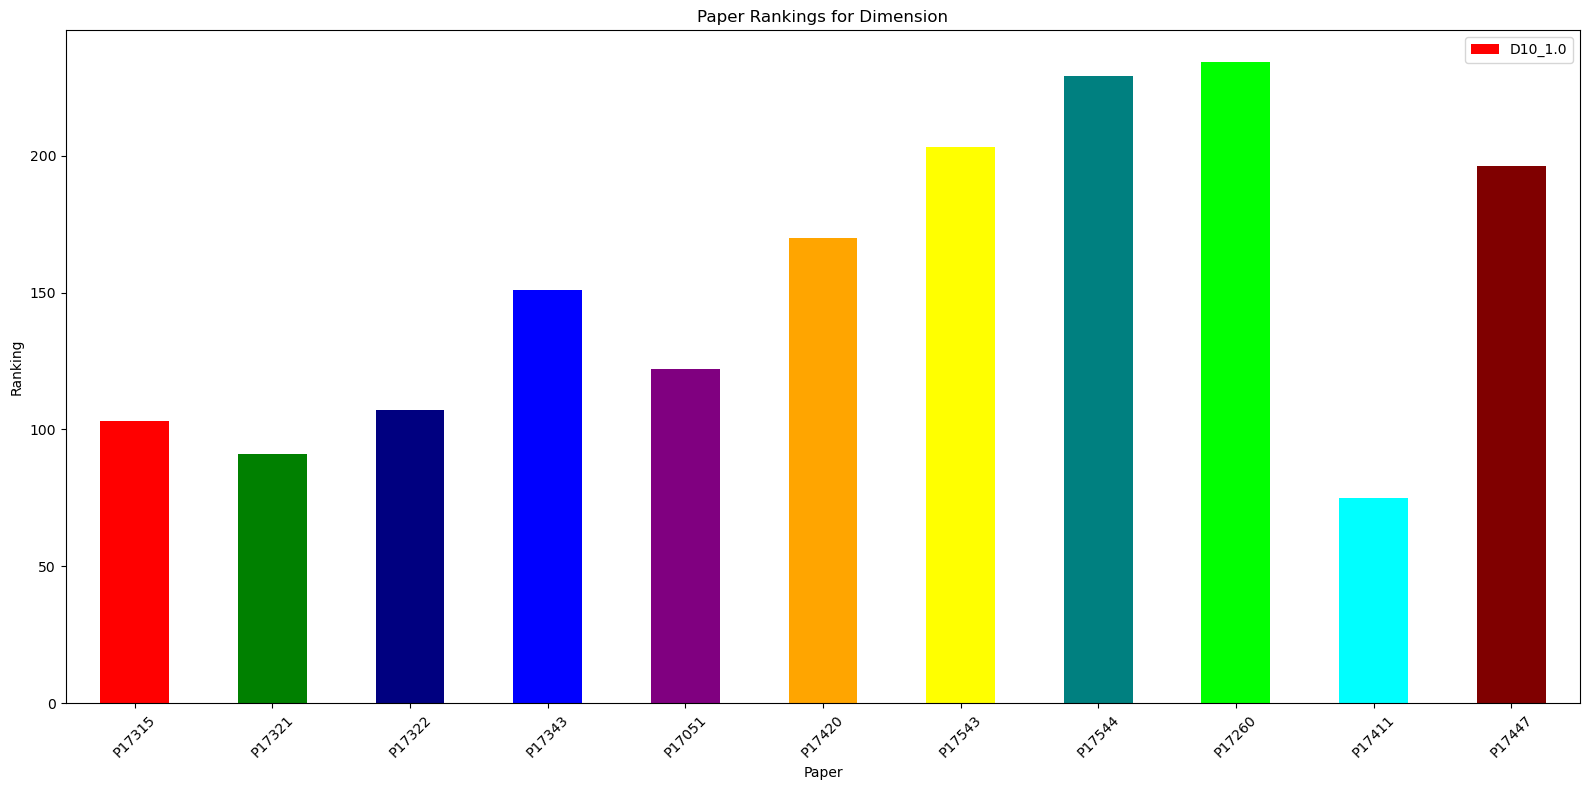

In [41]:
# Obtain the data stored earlier
freidman_summary = get_freidman_summary()
# Call the graph function
draw_freidman_summary(10)

# Wilcoxon Test Function-wise

## Wilcoxon Test Calculation

In [42]:
# Wilcoxon test summary table
from scipy.stats import wilcoxon

In [43]:
# Obtain the highest ranking algorithm between the D10_0.01
smallest_series = freidman_summary[10]["D10_0.01"][:-2]
highest_rank_p = smallest_series[smallest_series == smallest_series.min()].index[0]

In [44]:
# Function to create a schema for the dataframes of data
def createPvaluesDFSchema(reference_paper):
    '''
    Return: returns a dataframe structure to be stored.
            [ Function, ref_paper, compared_p, statistic, p_value, p_Bonf, p_Hola, p_Holm, p_Hoch, p_Homm ]
    '''
    column_names = ["function", "ref_paper",
                    "compared_p", "statistic",
                    "p_value", "p_Bonf",
                    "p_Hola", "p_Holm",
                    "p_Hoch", "p_Homm" ]
    df = pd.DataFrame(columns=column_names)
    df["ref_paper"] = reference_paper
    return df

In [45]:
# Function to construct the overall summary table
def createPvaluesSummarySchema(reference_paper):
    '''Create a dictionary to store the result:
        {10: {0.01: DataFrame[Function, ref_paper, compared_p, statistic, p_value, p_Bonf, p_Hola, p_Holm, p_Hoch, p_Homm]
              0.02: ...
               ... }
        30: ...
        ...
        }'''
    data_dic = {}
    for dimension in dimensions:
        temp_dic = {}
        '''{  0.01: DataFrame[Function, ref_paper, compared_p, 
                              statistic, p_value, p_Bonf, p_Hola,
                              p_Holm, p_Hoch, p_Homm]
              0.02: ...
               ... }
        '''
        for record_fun_error in record_fun_errors:
            temp_dic[record_fun_error] = createPvaluesDFSchema(reference_paper)
        data_dic[dimension] = temp_dic
    return data_dic


In [46]:
# Call schema methods to create the schema
pvalues_summary = createPvaluesSummarySchema(highest_rank_p)

In [47]:
# Function to perform the wilcoxon test and store value
def wilcoxonTest(dimension, func, paper_name, ref_data_array, data2_array):
    '''Function perform the wilcoxon test and storing the value in pvalues_summary'''
    global pvalues_summary, record_fun_errors, highest_rank_p
    # specify the location of
    func_index = "f" + str(func)

    for ind, run_error in enumerate(record_fun_errors):
        # add the mean
        statistic, pvalue = wilcoxon(ref_data_array[ind], data2_array[ind], zero_method="zsplit")
        # store the value into the appropriate dataframe
        last_row = len(pvalues_summary[dimension][run_error])
        pvalues_summary[dimension][run_error].at[last_row, "function"] = func_index
        pvalues_summary[dimension][run_error].at[last_row, "ref_paper"] = highest_rank_p
        pvalues_summary[dimension][run_error].at[last_row, "compared_p"] = paper_name
        pvalues_summary[dimension][run_error].at[last_row, "statistic"] = statistic
        pvalues_summary[dimension][run_error].at[last_row, "p_value"] = pvalue


In [48]:
# Function to prepare summary of results
def calculateWilcoxonSummary(ref_paper):
    '''
       Description: It prepares the data into the dataframes for wilcoxon test
    '''
    # pass over all the papers
    for dimension in dimensions:
        for func in range(1, 31):
            for paper_name in papers_names:
                # Verify paper is not reference paper
                if ref_paper == paper_name:
                    continue
                # Compose the reference file_name
                ref_file_name = composeFileName(ref_paper, dimension, func)
                # Compose the file name
                file2_name = composeFileName(paper_name, dimension, func)
                # Obtain the reference file as a numpy array
                ref_data_array = convertFileToNumpy(ref_file_name)
                # Obtain the file data as numpy array
                file2_data_array = convertFileToNumpy(file2_name)
                # Call the function to add the values to the dimension data summary
                wilcoxonTest(dimension, func, paper_name,ref_data_array ,file2_data_array)

    print("Wilcoxon test Summary Prepared Successfully")


In [49]:
# Call function to perform wilcoxon test
calculateWilcoxonSummary(highest_rank_p)

Wilcoxon test Summary Prepared Successfully


In [50]:
# Call function to store the values of the wilcoxon test
storeToExcelFiles(data=pvalues_summary, file_endings="WilcoxonResult-FuncWise",
                   test = "wilcoxon", index_added=False)

Successfully written data to excel files Dimension_WilcoxonResult-FuncWise.xlsx


## Wilcoxon Summary 

In [51]:
# The values in wilcoxon
cols = pvalues_summary[10][0.01].columns[:-5]
pvalues_summary[10][0.01][cols]

,function,ref_paper,compared_p,statistic,p_value
0,f1,P17260,P17315,0.0,0.0
1,f1,P17260,P17321,0.0,0.0
2,f1,P17260,P17322,0.0,0.0
3,f1,P17260,P17343,50.0,0.0
4,f1,P17260,P17051,0.0,0.0
...,...,...,...,...,...
295,f30,P17260,P17420,508.0,0.146255
296,f30,P17260,P17543,424.0,0.025074
297,f30,P17260,P17544,100.0,0.0
298,f30,P17260,P17411,2.0,0.0


## Wilcoxon Paper-wise

In [52]:
# Wilcoxon test summary table
from scipy.stats import wilcoxon

In [53]:
# Function to create a paper-wise wilcoxon schema for the dataframes of data
def createPaperWiseDFSchema(reference_paper):
    '''
    Return: returns a dataframe structure to be stored.
            [ Function, ref_paper, compared_p, statistic, p_value, p_Bonf, p_Hola, p_Holm, p_Hoch, p_Homm ]
    '''
    column_names = ["ref_paper",
                    "compared_p", "statistic",
                    "p_value", "p_Bonf",
                    "p_Hola", "p_Holm",
                    "p_Hoch", "p_Homm" ]
    df = pd.DataFrame(columns=column_names)
    df["ref_paper"] = reference_paper
    return df

In [54]:
# Function to construct the overall paper-wise summary table
def createPvaluesPaperWiseSummarySchema(reference_paper):
    '''Create a dictionary to store the result:
        {10: {0.01: DataFrame[ref_paper, compared_p, statistic, p_value, p_Bonf, p_Hola, p_Holm, p_Hoch, p_Homm]
              0.02: ...
               ... }
        30: ...
        ...
        }'''
    data_dic = {}
    for dimension in dimensions:
        temp_dic = {}
        '''{  0.01: DataFrame[ref_paper, compared_p, 
                              statistic, p_value, p_Bonf, p_Hola,
                              p_Holm, p_Hoch, p_Homm]
              0.02: ...
               ... }
        '''
        for record_fun_error in record_fun_errors:
            temp_dic[record_fun_error] = createPaperWiseDFSchema(reference_paper)
        data_dic[dimension] = temp_dic
    return data_dic


In [55]:
# View the structure
wilcoxon_paper_pvalues = createPvaluesPaperWiseSummarySchema(highest_rank_p)
wilcoxon_paper_pvalues

{10: {0.01: Empty DataFrame
  Columns: [ref_paper, compared_p, statistic, p_value, p_Bonf, p_Hola, p_Holm, p_Hoch, p_Homm]
  Index: [],
  0.02: Empty DataFrame
  Columns: [ref_paper, compared_p, statistic, p_value, p_Bonf, p_Hola, p_Holm, p_Hoch, p_Homm]
  Index: [],
  0.03: Empty DataFrame
  Columns: [ref_paper, compared_p, statistic, p_value, p_Bonf, p_Hola, p_Holm, p_Hoch, p_Homm]
  Index: [],
  0.05: Empty DataFrame
  Columns: [ref_paper, compared_p, statistic, p_value, p_Bonf, p_Hola, p_Holm, p_Hoch, p_Homm]
  Index: [],
  0.1: Empty DataFrame
  Columns: [ref_paper, compared_p, statistic, p_value, p_Bonf, p_Hola, p_Holm, p_Hoch, p_Homm]
  Index: [],
  0.2: Empty DataFrame
  Columns: [ref_paper, compared_p, statistic, p_value, p_Bonf, p_Hola, p_Holm, p_Hoch, p_Homm]
  Index: [],
  0.3: Empty DataFrame
  Columns: [ref_paper, compared_p, statistic, p_value, p_Bonf, p_Hola, p_Holm, p_Hoch, p_Homm]
  Index: [],
  0.4: Empty DataFrame
  Columns: [ref_paper, compared_p, statistic, p_valu

In [56]:
# Obtain the dat from the summary tables
summary_data = prepareSummaryDF()
summary_data

{10: {0.01:            P17315_mean    P17315_std   P17321_mean    P17321_std  \
  function                                                           
  f1        4.601045e+09  1.337141e+09  2.328090e+09  7.011825e+08   
  f2        5.802840e+10  9.144115e+10  3.331031e+10  1.854509e+11   
  f3        2.219993e+04  6.261321e+03  1.481077e+04  4.936999e+03   
  f4        2.861153e+02  9.739833e+01  1.718990e+02  5.994297e+01   
  f5        8.651451e+01  1.311320e+01  7.209060e+01  1.158216e+01   
  f6        5.037912e+01  7.056564e+00  4.019724e+01  5.483341e+00   
  f7        1.872683e+02  2.825422e+01  1.373544e+02  1.740693e+01   
  f8        8.172919e+01  8.527048e+00  6.852272e+01  7.464595e+00   
  f9        1.293984e+03  3.247551e+02  7.391154e+02  2.070913e+02   
  f10       2.010533e+03  1.826366e+02  2.001973e+03  2.163078e+02   
  f11       1.189835e+03  8.633625e+02  5.618945e+02  3.131058e+02   
  f12       2.211581e+08  1.069491e+08  1.200606e+08  1.390304e+08   
  f13     

In [57]:
# Function to calculate the paper-wise Wilcoxon test
def wilcoxon_paper_test(highest_paper, dimension):
    global summary_data
    # first paper values
    for record_fun_error in record_fun_errors:
        ref_paper_data = summary_data[dimension][record_fun_error][highest_paper+"_mean"]

        for paper in papers_names:
                if paper == highest_paper: # skip testing highest paper with itself
                    continue
                # second paper values
                p2_data = summary_data[dimension][record_fun_error][paper+"_mean"]
                # wilcoxon test
                statistic, p_value = wilcoxon(ref_paper_data, p2_data)
                # Obtain the last row index
                last_row = len(wilcoxon_paper_pvalues[dimension][record_fun_error])
                # add to overall summary
                wilcoxon_paper_pvalues[dimension][record_fun_error].at[last_row, "ref_paper"]  = highest_paper
                wilcoxon_paper_pvalues[dimension][record_fun_error].at[last_row, "compared_p"]  = paper
                wilcoxon_paper_pvalues[dimension][record_fun_error].at[last_row, "statistic"]  = statistic
                wilcoxon_paper_pvalues[dimension][record_fun_error].at[last_row, "p_value"]  = p_value

In [58]:
# Call the function to perform the wilcoxon test per paper
for dimension in dimensions:
    wilcoxon_paper_test(highest_rank_p, dimension)

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [59]:
# Verify performance of paper-wise wilcoxon
wilcoxon_paper_pvalues[10][0.01]

,ref_paper,compared_p,statistic,p_value,p_Bonf,p_Hola,p_Holm,p_Hoch,p_Homm
0,P17260,P17315,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,P17260,P17321,17.0,0.0,NaN,NaN,NaN,NaN,NaN
2,P17260,P17322,124.0,0.024786,NaN,NaN,NaN,NaN,NaN
3,P17260,P17343,78.0,0.000952,NaN,NaN,NaN,NaN,NaN
4,P17260,P17051,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5,P17260,P17420,107.0,0.008705,NaN,NaN,NaN,NaN,NaN
6,P17260,P17543,51.0,0.000063,NaN,NaN,NaN,NaN,NaN
7,P17260,P17544,9.0,0.0,NaN,NaN,NaN,NaN,NaN
8,P17260,P17411,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9,P17260,P17447,0.0,0.0,NaN,NaN,NaN,NaN,NaN


# Post-Hoc Tests

## Tests Procedures

In [60]:
# Function to calculate the dunn-sidak correction p-values [values = max(1, 1 - (1 - p)^m).]
def dunn_sidak_correction(p_values, p_val_count=None):
    ''' Function to obtain the adjusted p-values for Bonneferri'''
    if p_val_count is None:
        p_val_count = len(p_values)
    return 1 - (1 - np.array(p_values)) ** (1 / p_val_count)

In [61]:
# Function to calculate the adjusted p-values using Holm procedure
def holm_procedure(p_values, alpha=0.05):
    p_values = np.array(p_values)
    m = len(p_values)
    sorted_indices = np.argsort(p_values)
    sorted_p_values = p_values[sorted_indices]
    adjusted_p_values = np.zeros(m)
    
    for i in range(m):
        adjusted_p_values[i] = min((m - i) * sorted_p_values[i], 1)
    
    for i in range(m-1):
        adjusted_p_values[i] = max(adjusted_p_values[i], adjusted_p_values[i+1])
    
    # Reorder the adjusted p-values to match the original order
    adjusted_p_values = adjusted_p_values[np.argsort(sorted_indices)]
    return adjusted_p_values

In [62]:
# Function to calculate the adjusted p-values using the Holland Procedure
def holland_correction(p_values):
  """It performs the holland adjusting of p values"""
  p_values = np.array(p_values)
  m = len(p_values)
  sorted_indices = np.argsort(p_values)
  sorted_pvals = p_values[sorted_indices]

  adjusted_pvals = np.full(m, np.inf)
  for k in range(m):
    i = m - k
    # Calculate minimum for forward direction
    forward_min = min(
        [(i + j) * sorted_pvals[j] / (j + 1) for j in range(i)]
    )
    # Calculate minimum for backward direction (including previous adjustment)
    backward_min = min(
        adjusted_pvals[j] for j in range(k, m)
    ) if k > 0 else np.inf
    adjusted_pvals[k] = min(forward_min, backward_min)

  # Reordering adjusted p-values to match original order
  corrected_p_values = np.empty(m)
  corrected_p_values[sorted_indices] = adjusted_pvals
  return corrected_p_values



In [63]:
# Function to calculate the adjusted p-values using the Hochberg Procedure
def hochberg_correction(p_values, alpha=0.05):
    # Sort p-values in ascending order and keep track of original indices
    p_sorted_indices = np.argsort(p_values)
    p_sorted = np.array(p_values)[p_sorted_indices]

    m = len(p_values)
    adjusted_pvalues = np.empty(m)
    rejected = np.empty(m, dtype=bool)

    # Perform Hochberg's step-up procedure
    for i in range(m):
        k = m - i
        adjusted_pvalues[p_sorted_indices[i]] = min(1, p_sorted[i] * (k))
        if i == 0:
            continue
        adjusted_pvalues[p_sorted_indices[i]] = max(adjusted_pvalues[p_sorted_indices[i]], adjusted_pvalues[p_sorted_indices[i-1]])

    # Determine which hypotheses to reject
    for i in range(m):
        rejected[p_sorted_indices[i]] = p_sorted[i] <= alpha / (m - i)

    return  list(adjusted_pvalues)


In [64]:
# Function to calculate the adjusted p-values using the Hommel Procedure
def hommel_correction(p_values):
    p_values = np.array(p_values)
    m = len(p_values)
    sorted_indices = np.argsort(p_values)
    sorted_pvals = p_values[sorted_indices]
    
    adjusted_pvals = np.full(m, np.inf)
    for k in range(m):
        i = m - k
        adjusted_pvals[k] = min(
            np.min([(i + j) * sorted_pvals[j] / (j + 1) for j in range(i)]),
            adjusted_pvals[k - 1] if k > 0 else np.inf
        )
    
    for k in range(m):
        i = k + 1
        adjusted_pvals[k] = min(
            adjusted_pvals[k],
            np.min([adjusted_pvals[j] for j in range(k, m)]),
            sorted_pvals[k] * m / i
        )
    
    # Reordering adjusted p-values to match original order of p-values
    corrected_p_values = np.empty(m)
    corrected_p_values[sorted_indices] = adjusted_pvals
    return corrected_p_values

## Calculating The Adjusted P-values Function-wise

In [65]:
# Loop over dimensions to obtain the adjusted p-values for all tests.
def calculatedAdjustedPvalues(data):
    for dimension in dimensions:
        for record_fun_error in record_fun_errors:
            unadjusted_p_values = data[dimension][record_fun_error]["p_value"]
            # Calculate the adjusted Bonferri p values
            data[dimension][record_fun_error]["p_Bonf"] = dunn_sidak_correction( unadjusted_p_values )

            # Calculate the adjusted Holm procedure
            data[dimension][record_fun_error]["p_Holm"] = holm_procedure( unadjusted_p_values)

            # Calculate the adjusted Holland procedure
            data[dimension][record_fun_error]["p_Hola"] = holland_correction( unadjusted_p_values)

            # Calculate the adjusted Hochberg procedure
            data[dimension][record_fun_error]["p_Hoch"] = hochberg_correction( unadjusted_p_values)

            # Calculate the adjusted Hommel procedure
            data[dimension][record_fun_error]["p_Homm"] = hommel_correction( unadjusted_p_values)

    print("Successfully calculated the adjusted 'P' values")


In [66]:
# Call function to calculate the adjusted Pvalues
calculatedAdjustedPvalues(pvalues_summary)

Successfully calculated the adjusted 'P' values


In [67]:
# Store the results in a summary tables
storeToExcelFiles(data=pvalues_summary, file_endings="PvaluesSummmary",  test=None, index_added=False)

Successfully written data to excel files Dimension_PvaluesSummmary.xlsx


## Calculating The Adjusted P-values Paper-wise

In [68]:
# Call function to calculate the adjusted Pvalues Paper-wise
calculatedAdjustedPvalues(wilcoxon_paper_pvalues)

Successfully calculated the adjusted 'P' values


In [69]:
# Store the results in a Paper-wise summary tables 
storeToExcelFiles(data=wilcoxon_paper_pvalues, file_endings="PvaluesSummmary-PaperWise",  test=None, index_added=False)

Successfully written data to excel files Dimension_PvaluesSummmary-PaperWise.xlsx
